In [88]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set("talk","ticks",font_scale=1,font="sans-serif",color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
plt.rcParams["figure.dpi"] = 300
import scipy.stats as stats
import statsmodels.api as sm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [43]:
df = pd.read_csv(r"C:\Users\Tshepo\Desktop\MLAgortihms\Datasets\Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


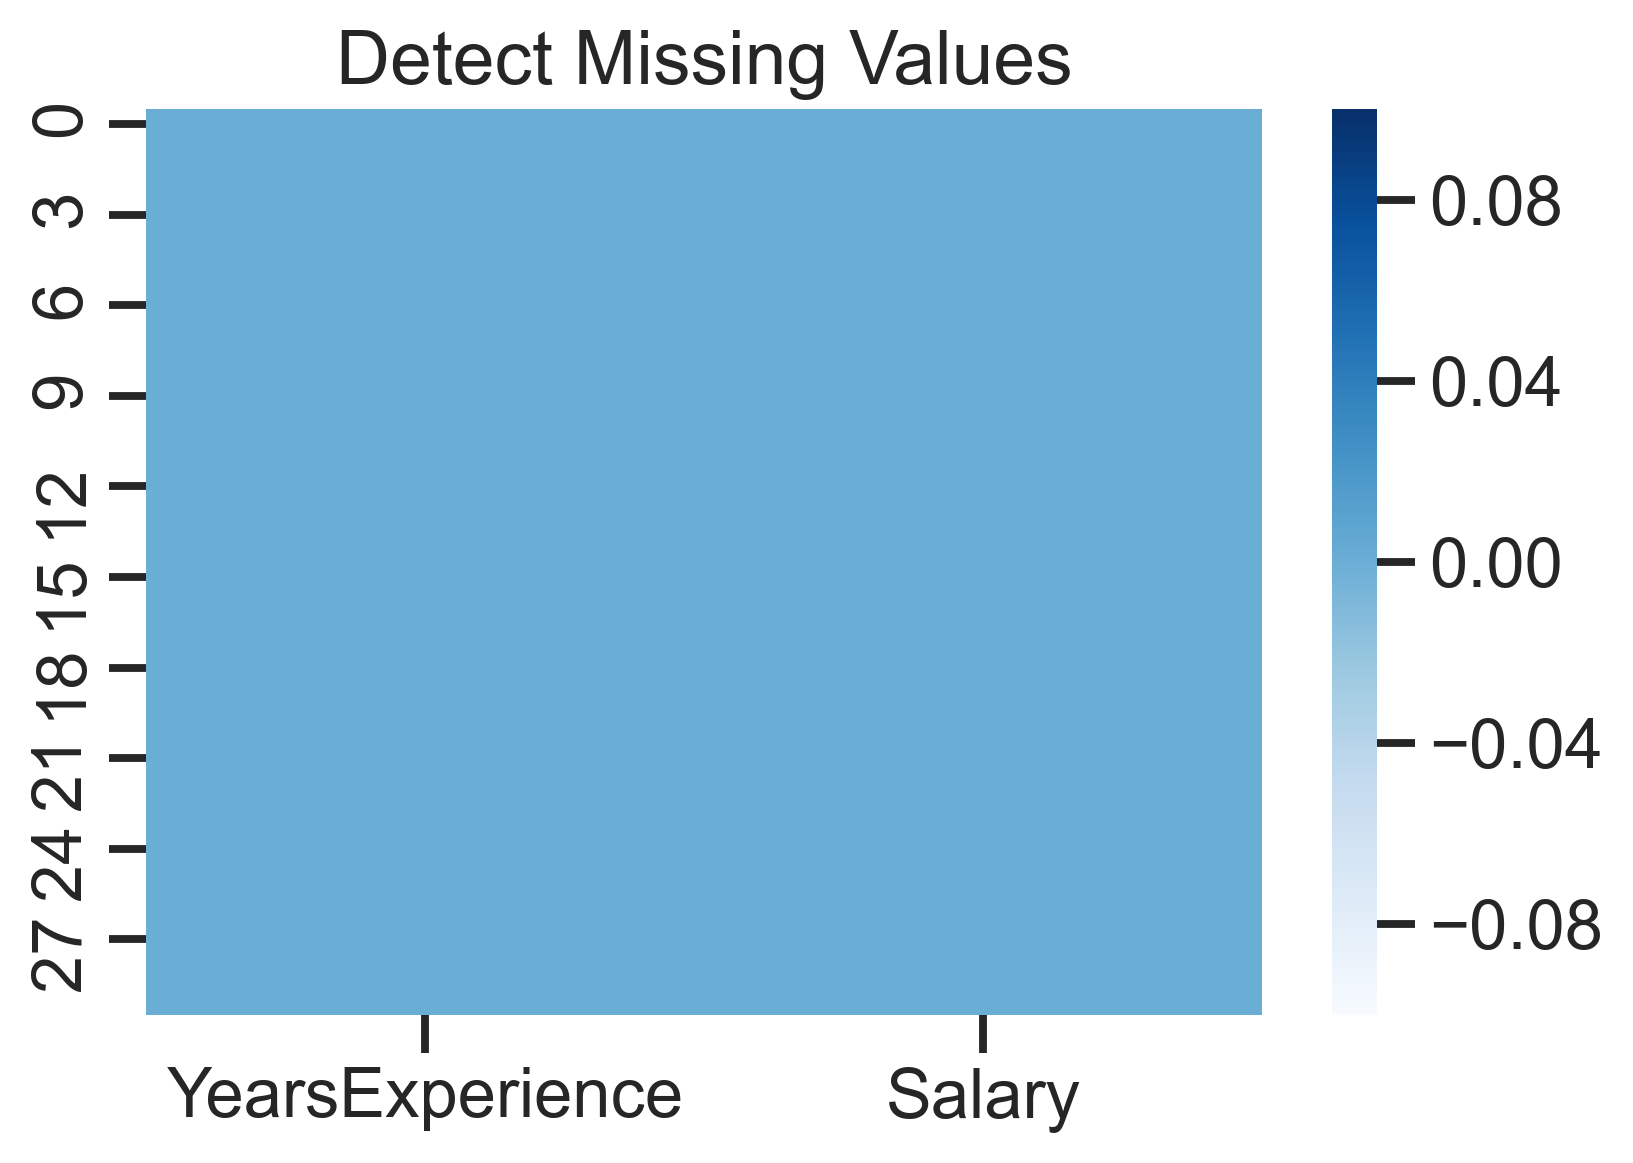

In [44]:
sns.heatmap(df.isnull(),cmap="Blues")
plt.title("Detect Missing Values")
plt.show()

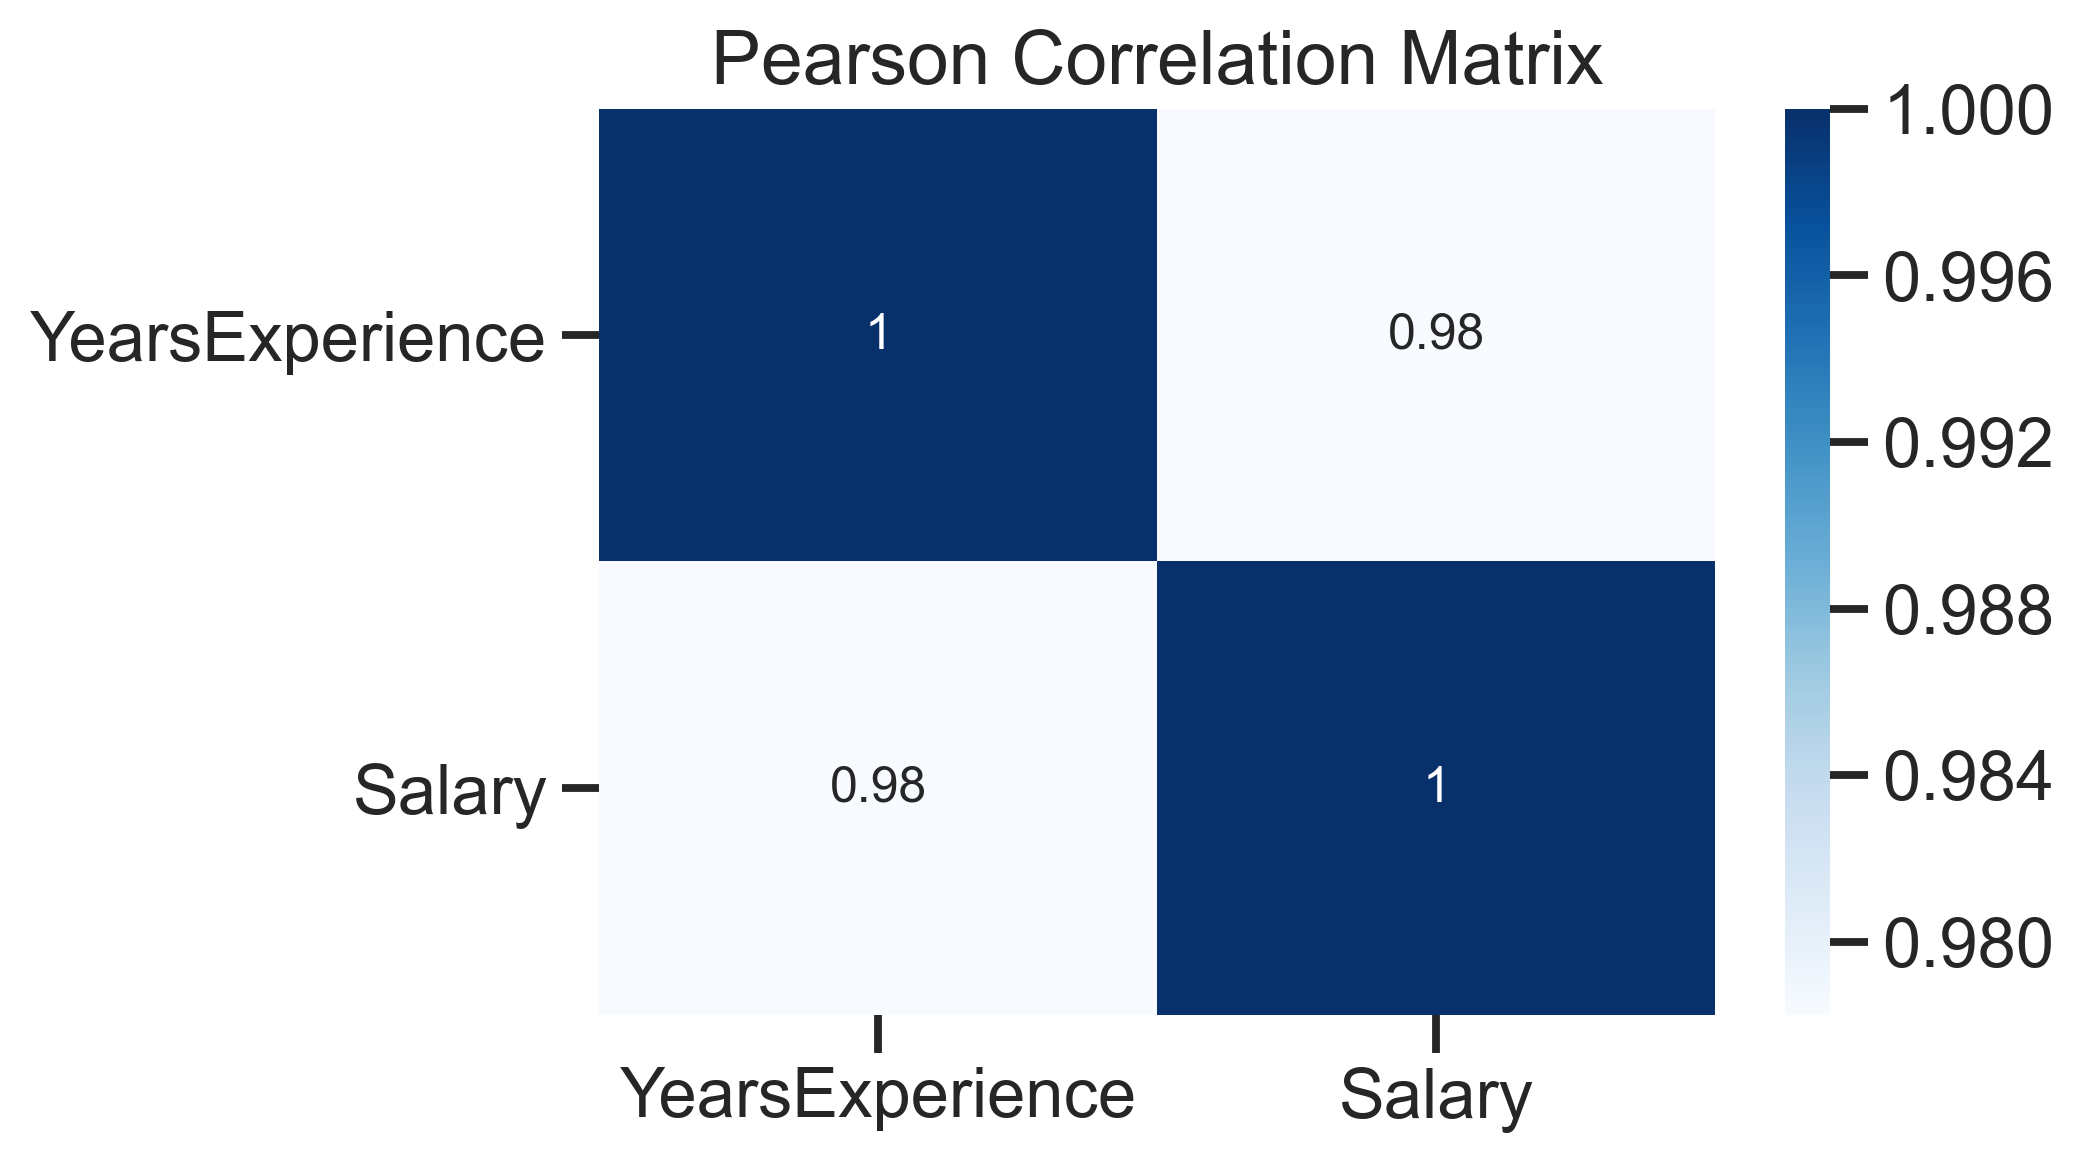

In [45]:
dfcorr = df.corr(method="pearson")
sns.heatmap(dfcorr, annot=True,annot_kws={"size":12}, cmap="Blues")
plt.title("Pearson Correlation Matrix")
plt.show()


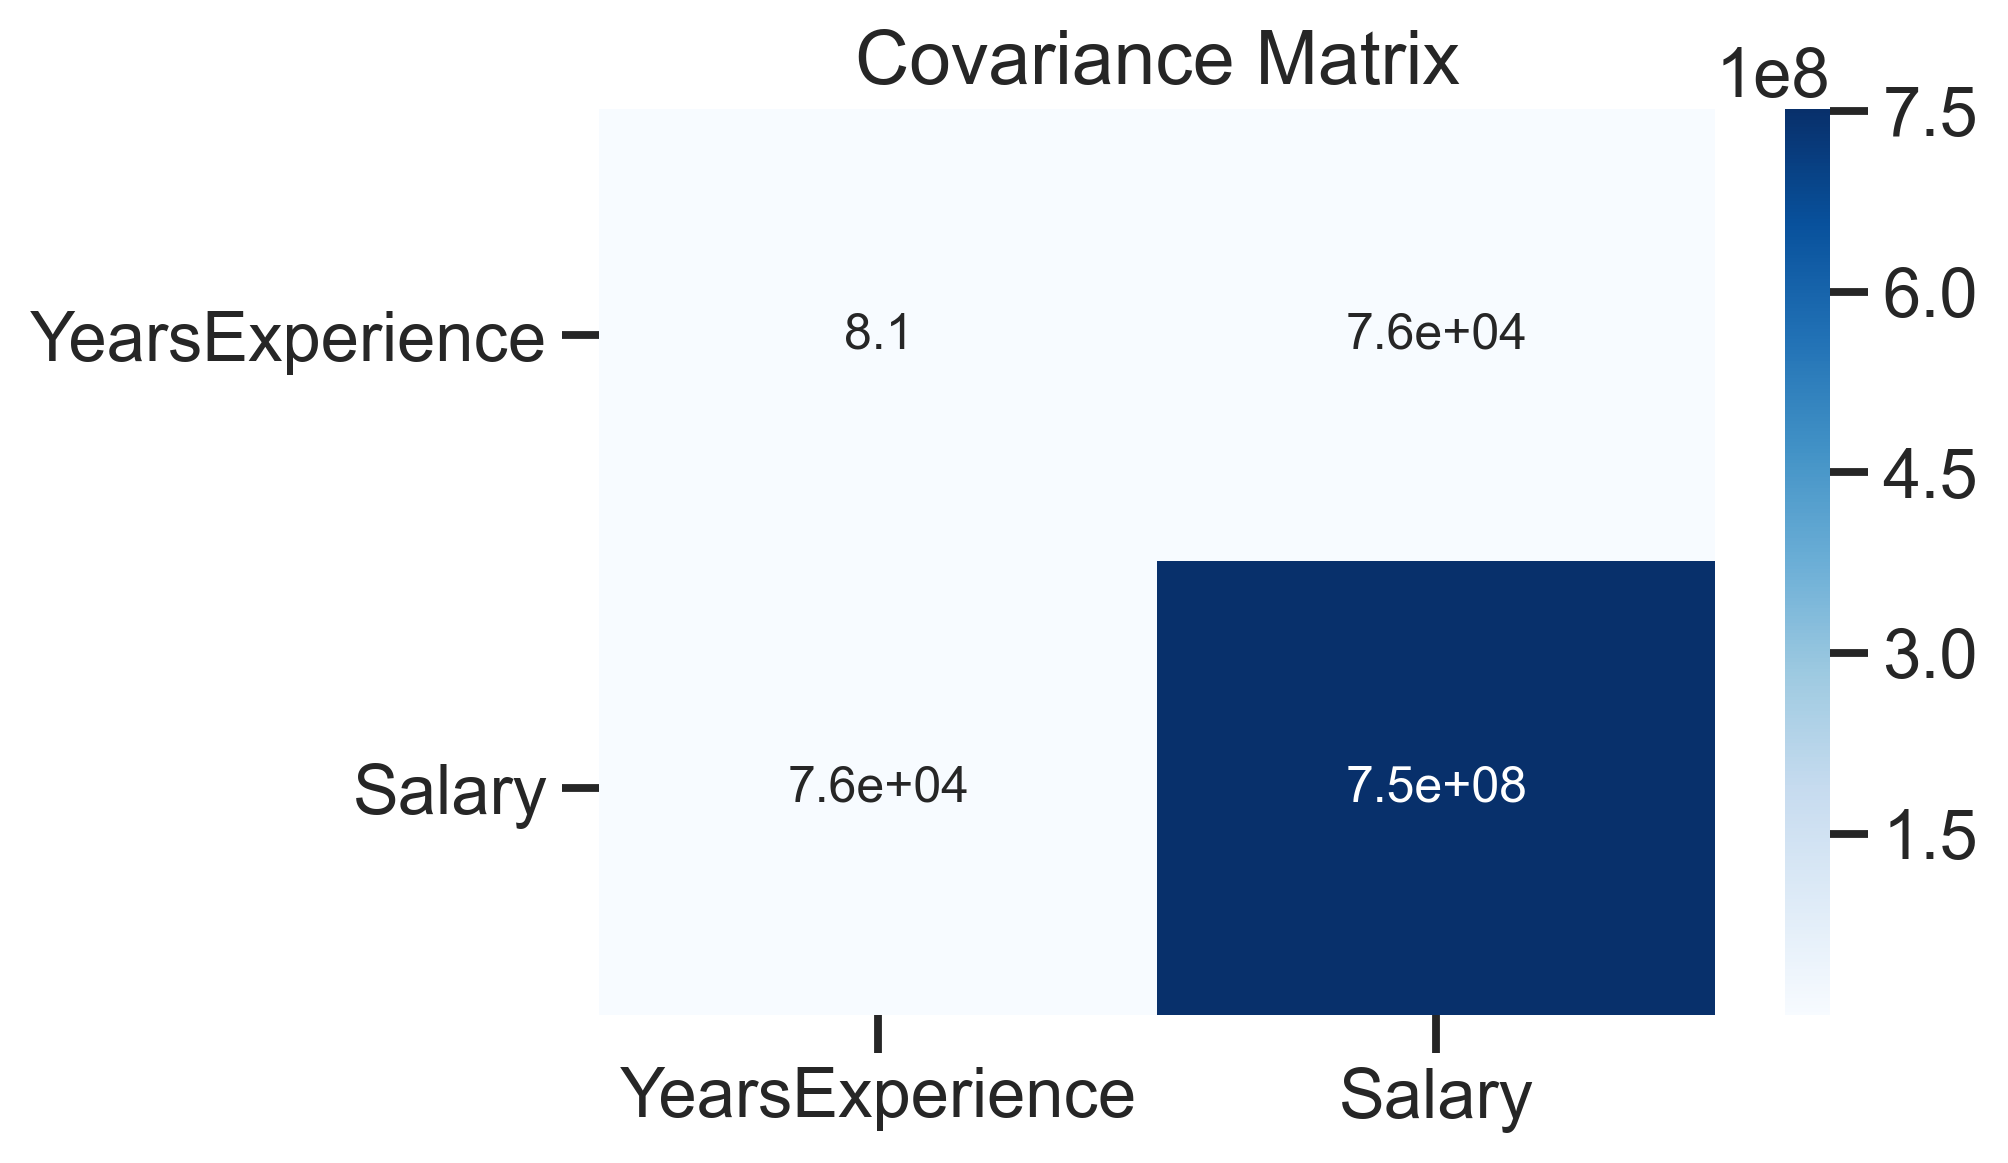

In [46]:
dfcov = df.cov()
sns.heatmap(dfcov, annot=True,annot_kws={"size":12}, cmap="Blues")
plt.title("Covariance Matrix")
plt.show()


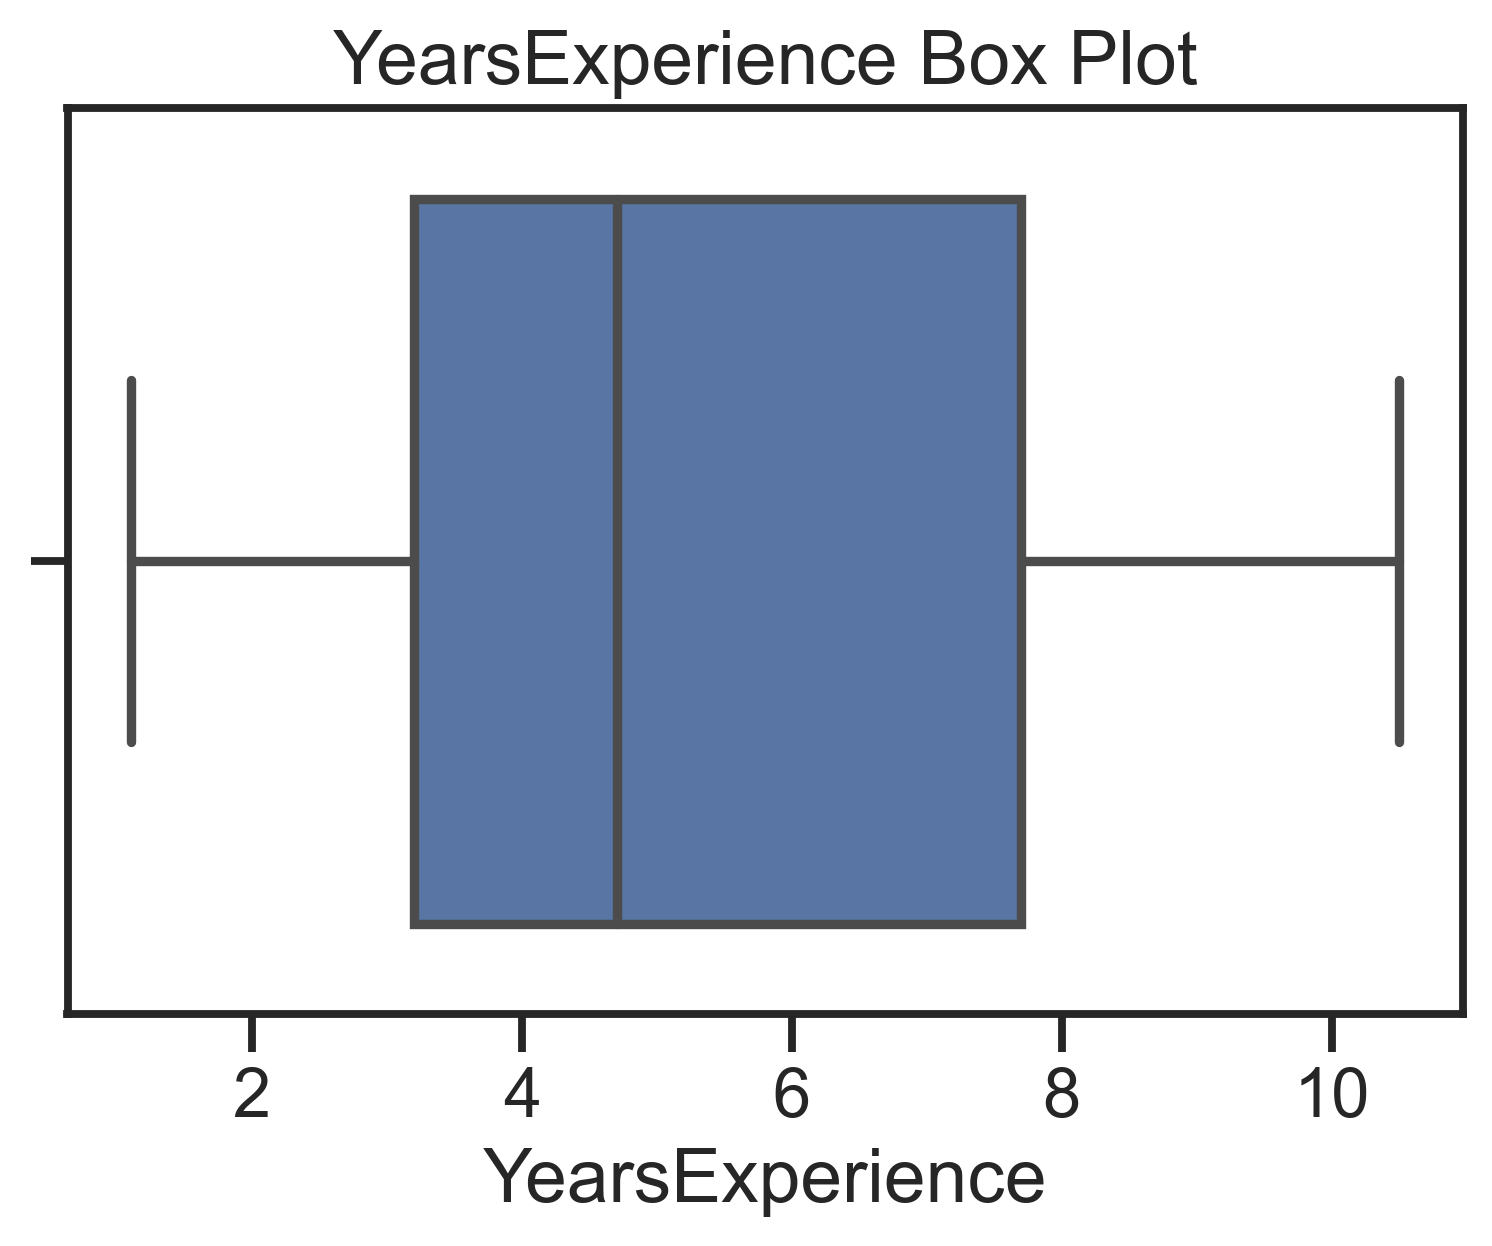

In [47]:
sns.boxplot(df["YearsExperience"])
plt.title("YearsExperience Box Plot")
plt.show()

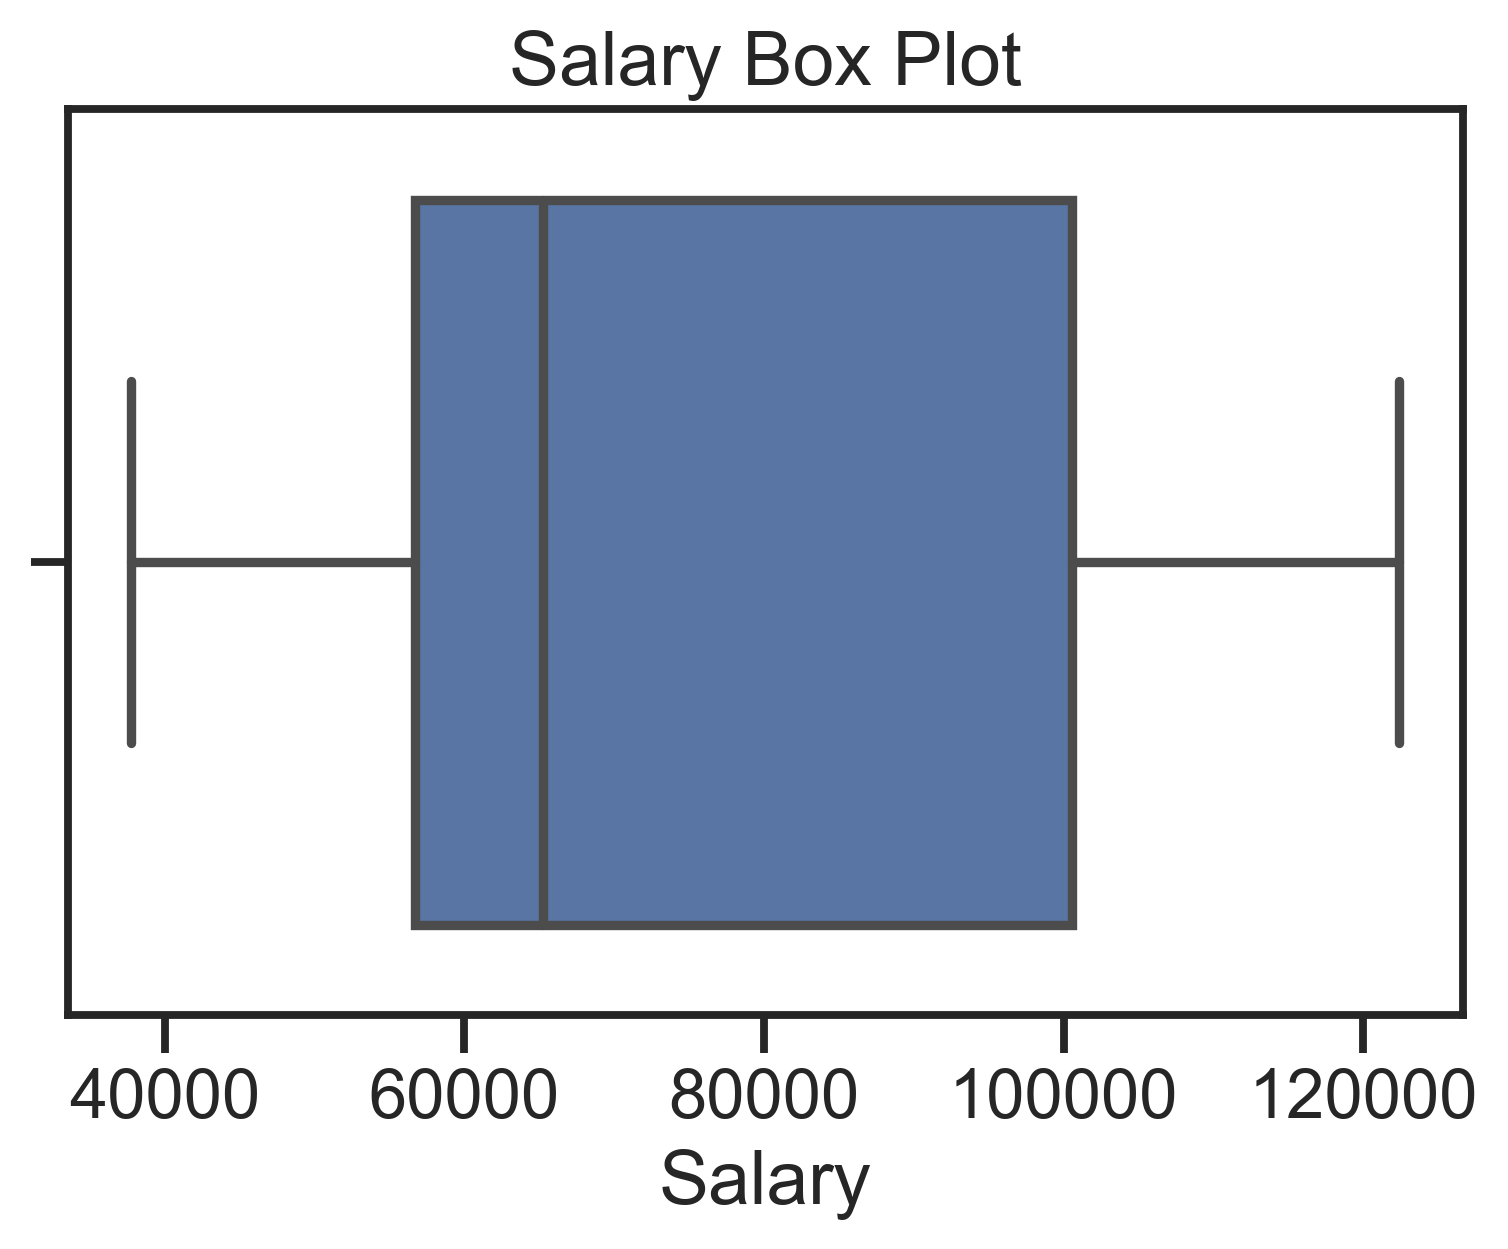

In [48]:
sns.boxplot(df["Salary"])
plt.title("Salary Box Plot")
plt.show()

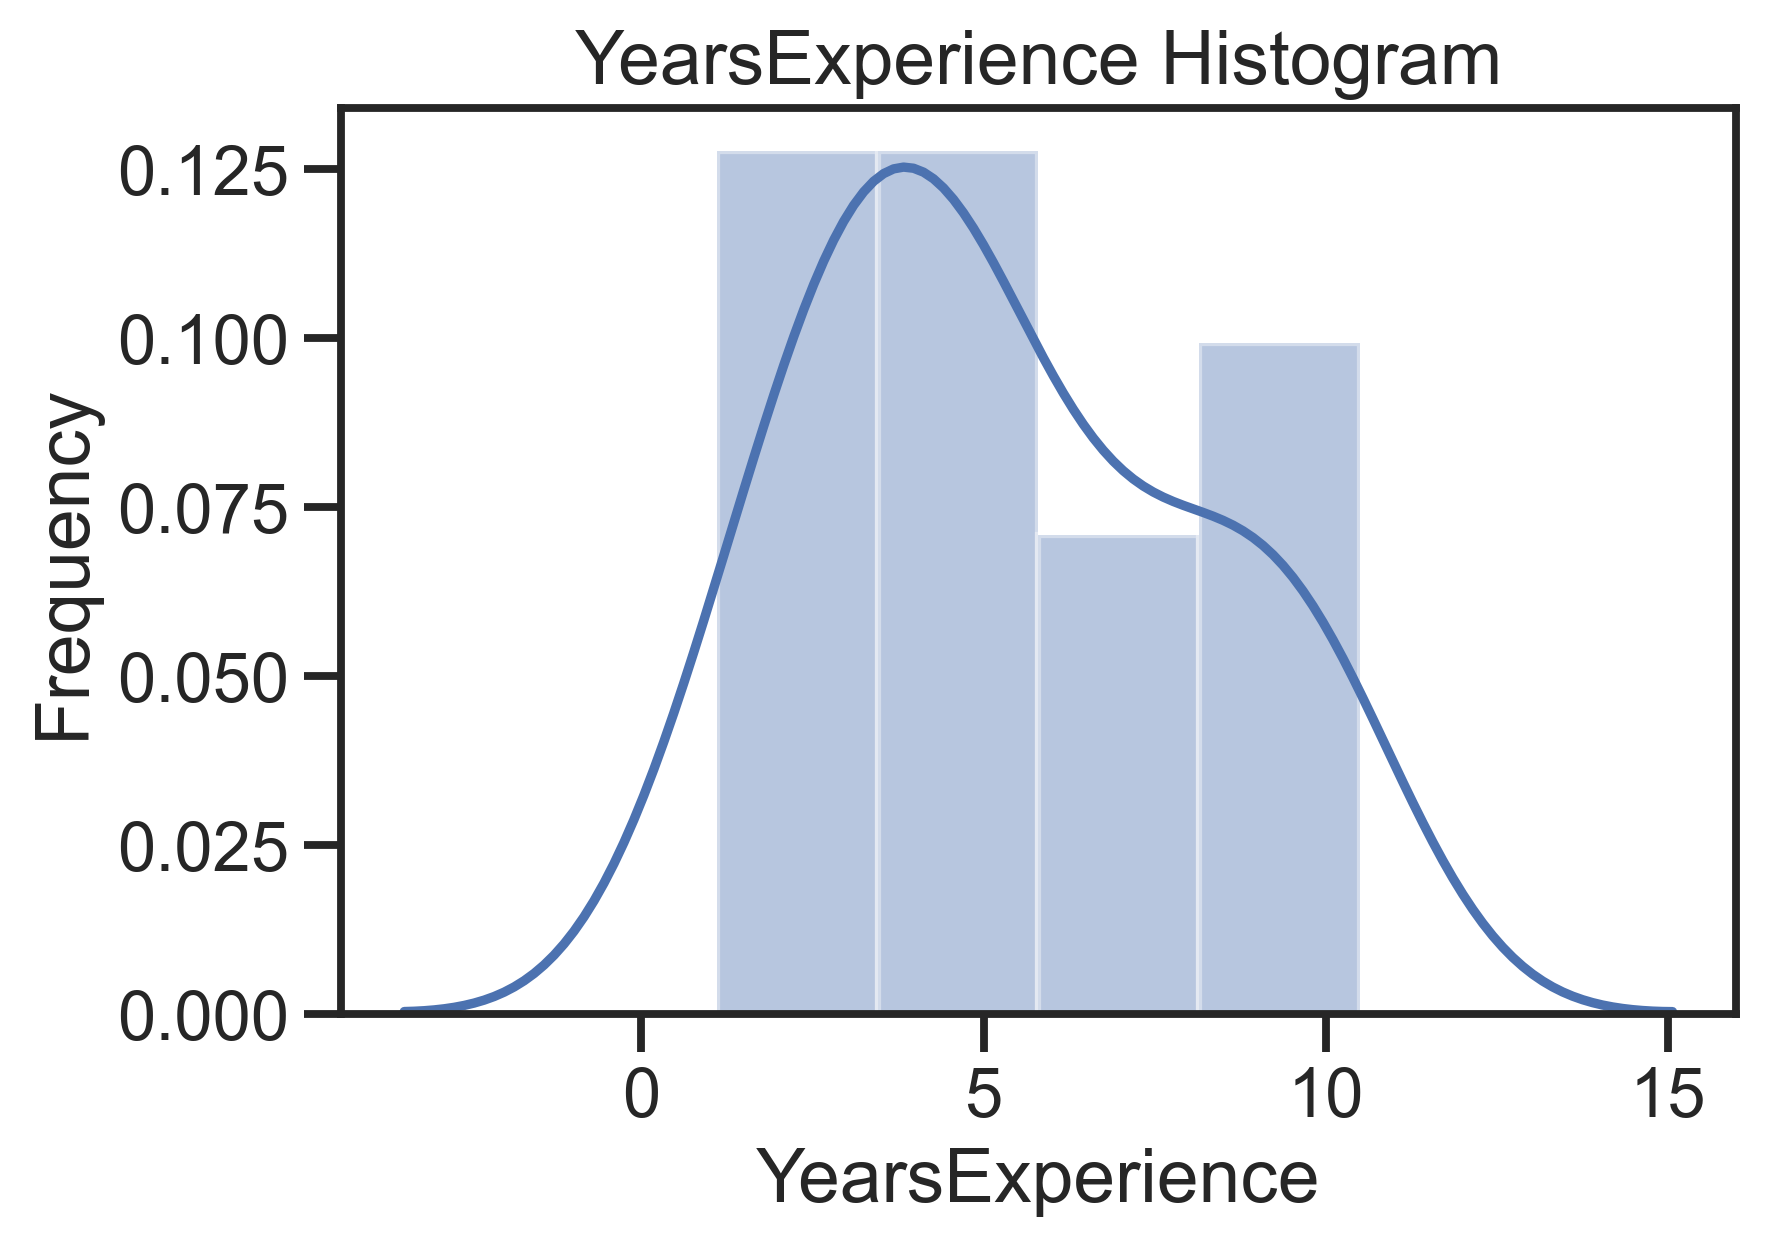

In [49]:
sns.distplot(df["YearsExperience"])
plt.title("YearsExperience Histogram")
plt.ylabel("Frequency")
plt.show()

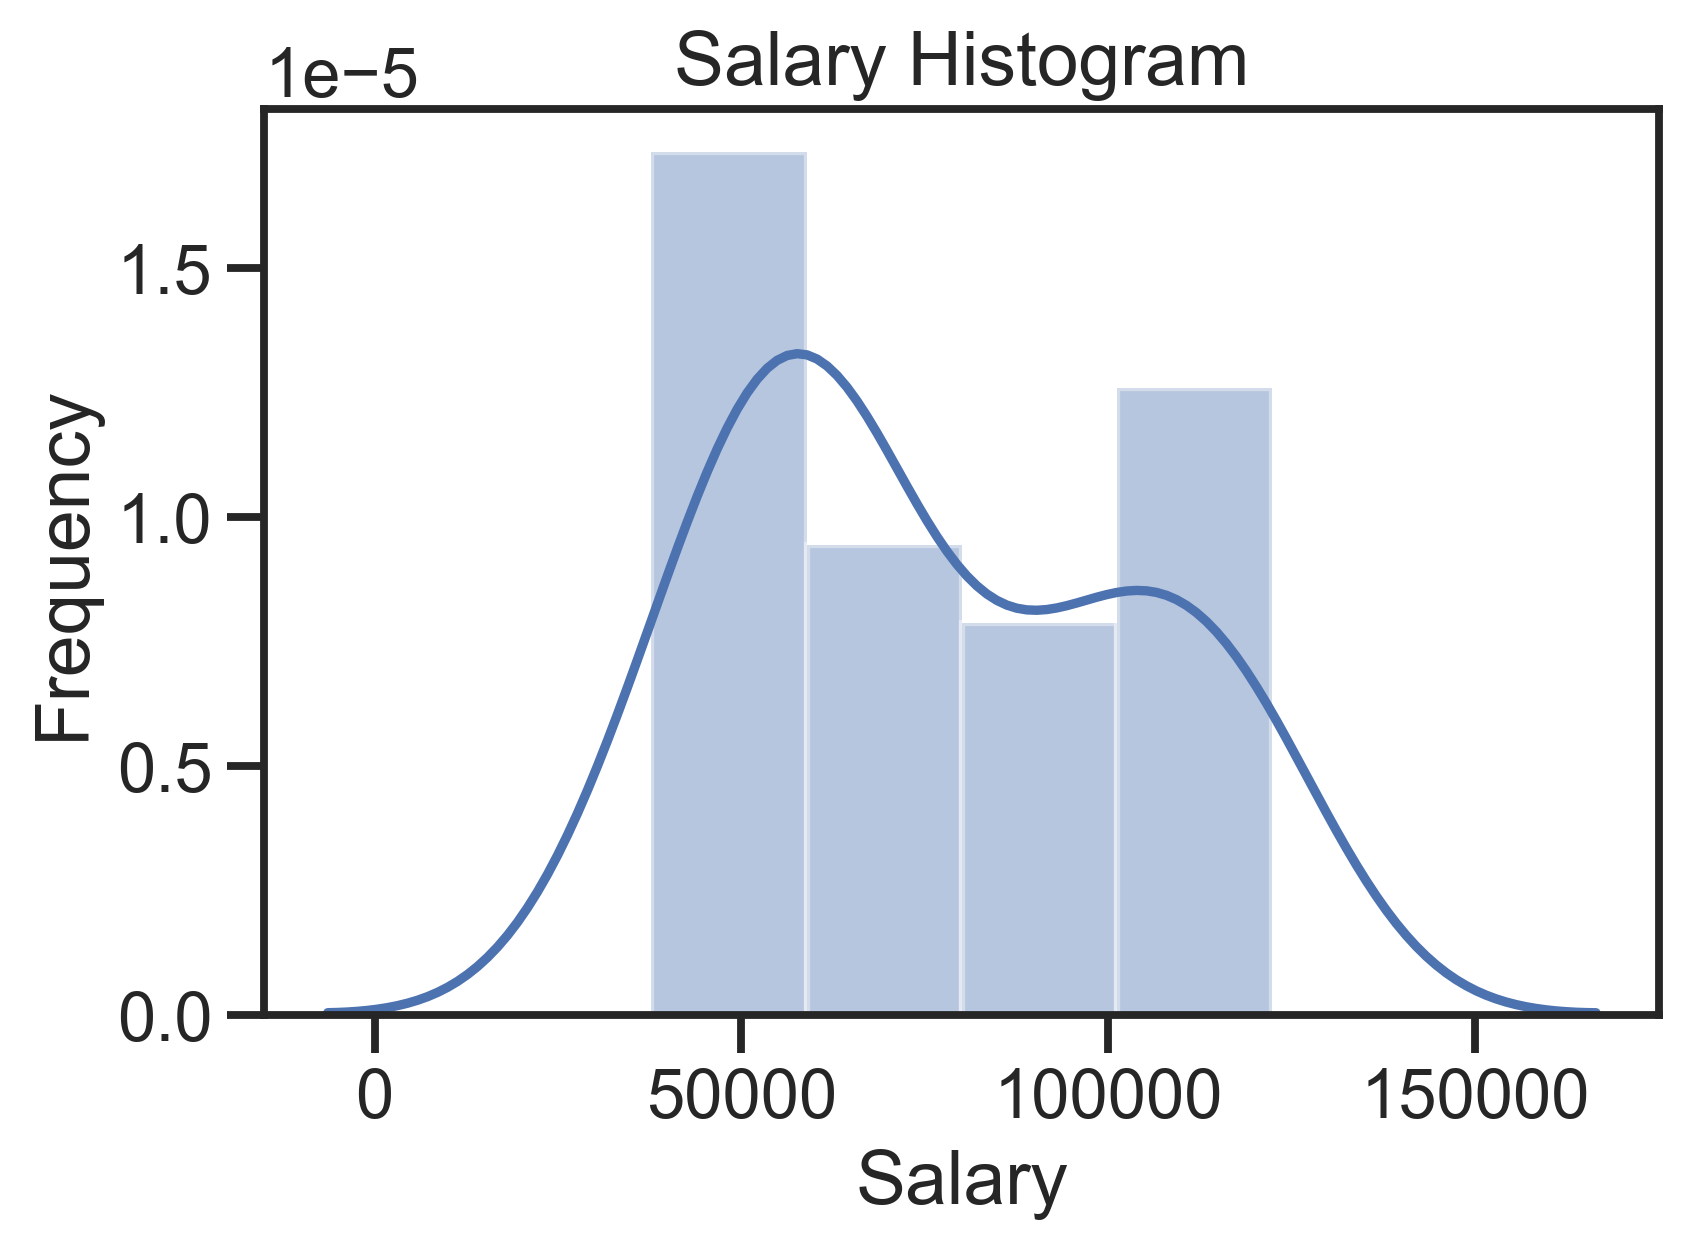

In [50]:
sns.distplot(df["Salary"])
plt.title("Salary Histogram")
plt.ylabel("Frequency")
plt.show()

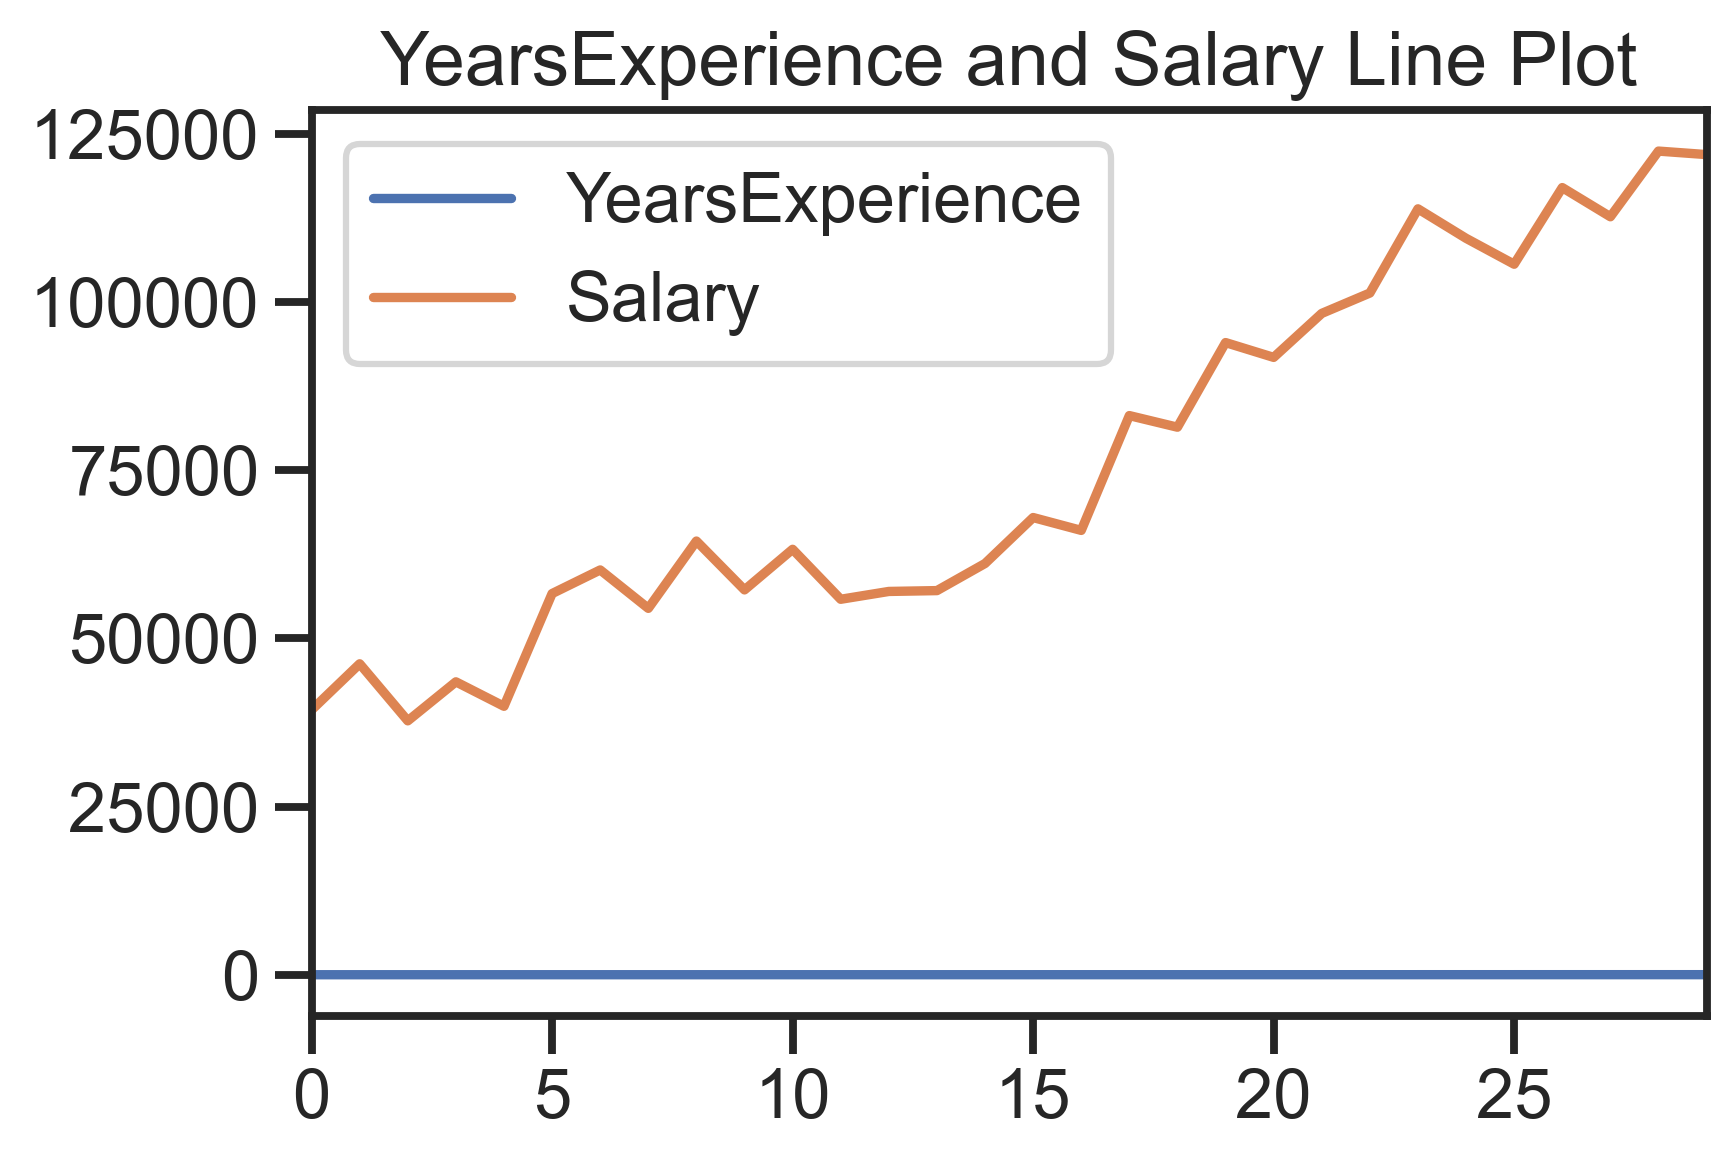

In [51]:
df.plot(kind="line")
plt.title("YearsExperience and Salary Line Plot")
plt.show()


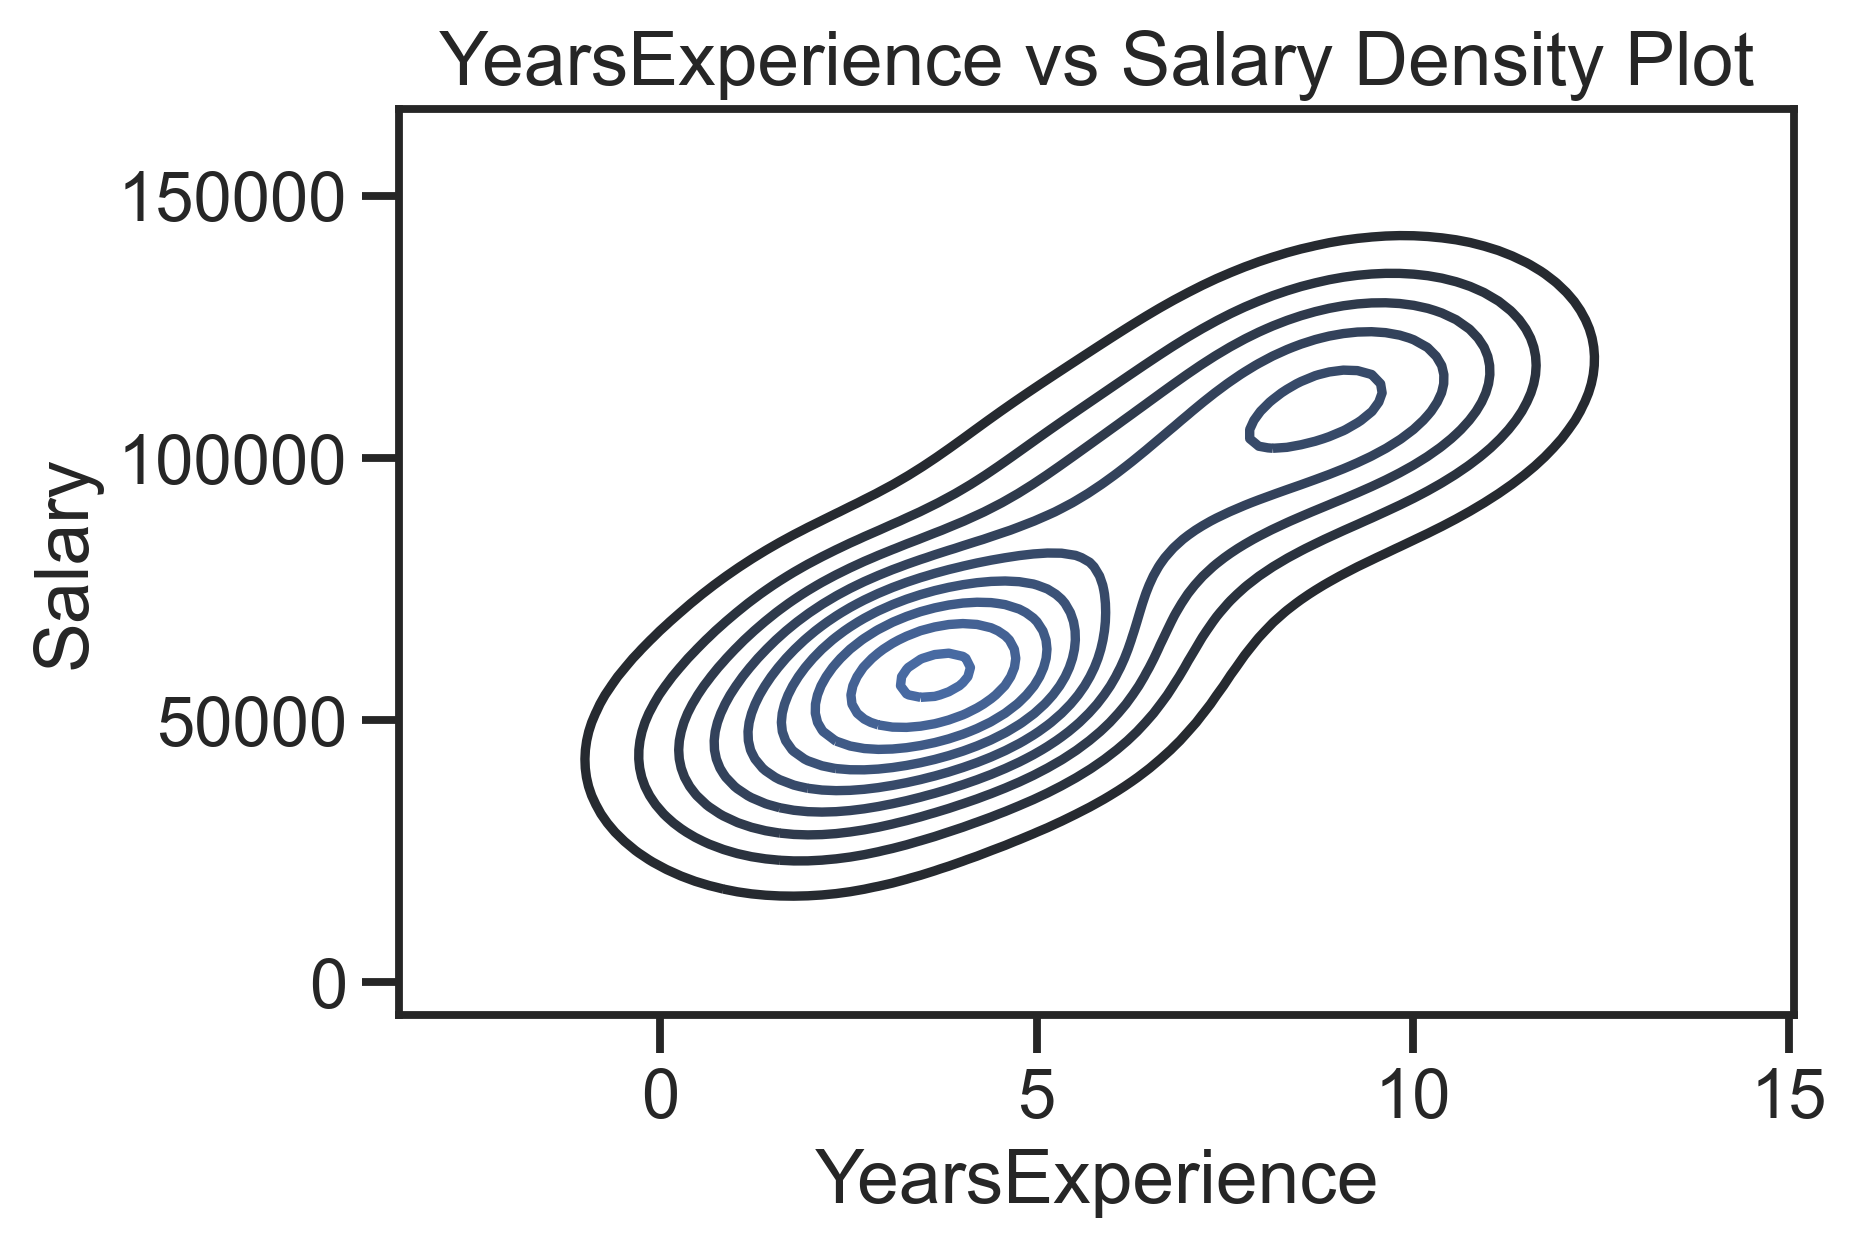

In [52]:
sns.kdeplot(df["YearsExperience"],df["Salary"])
plt.title("YearsExperience vs Salary Density Plot")
plt.show()

In [53]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


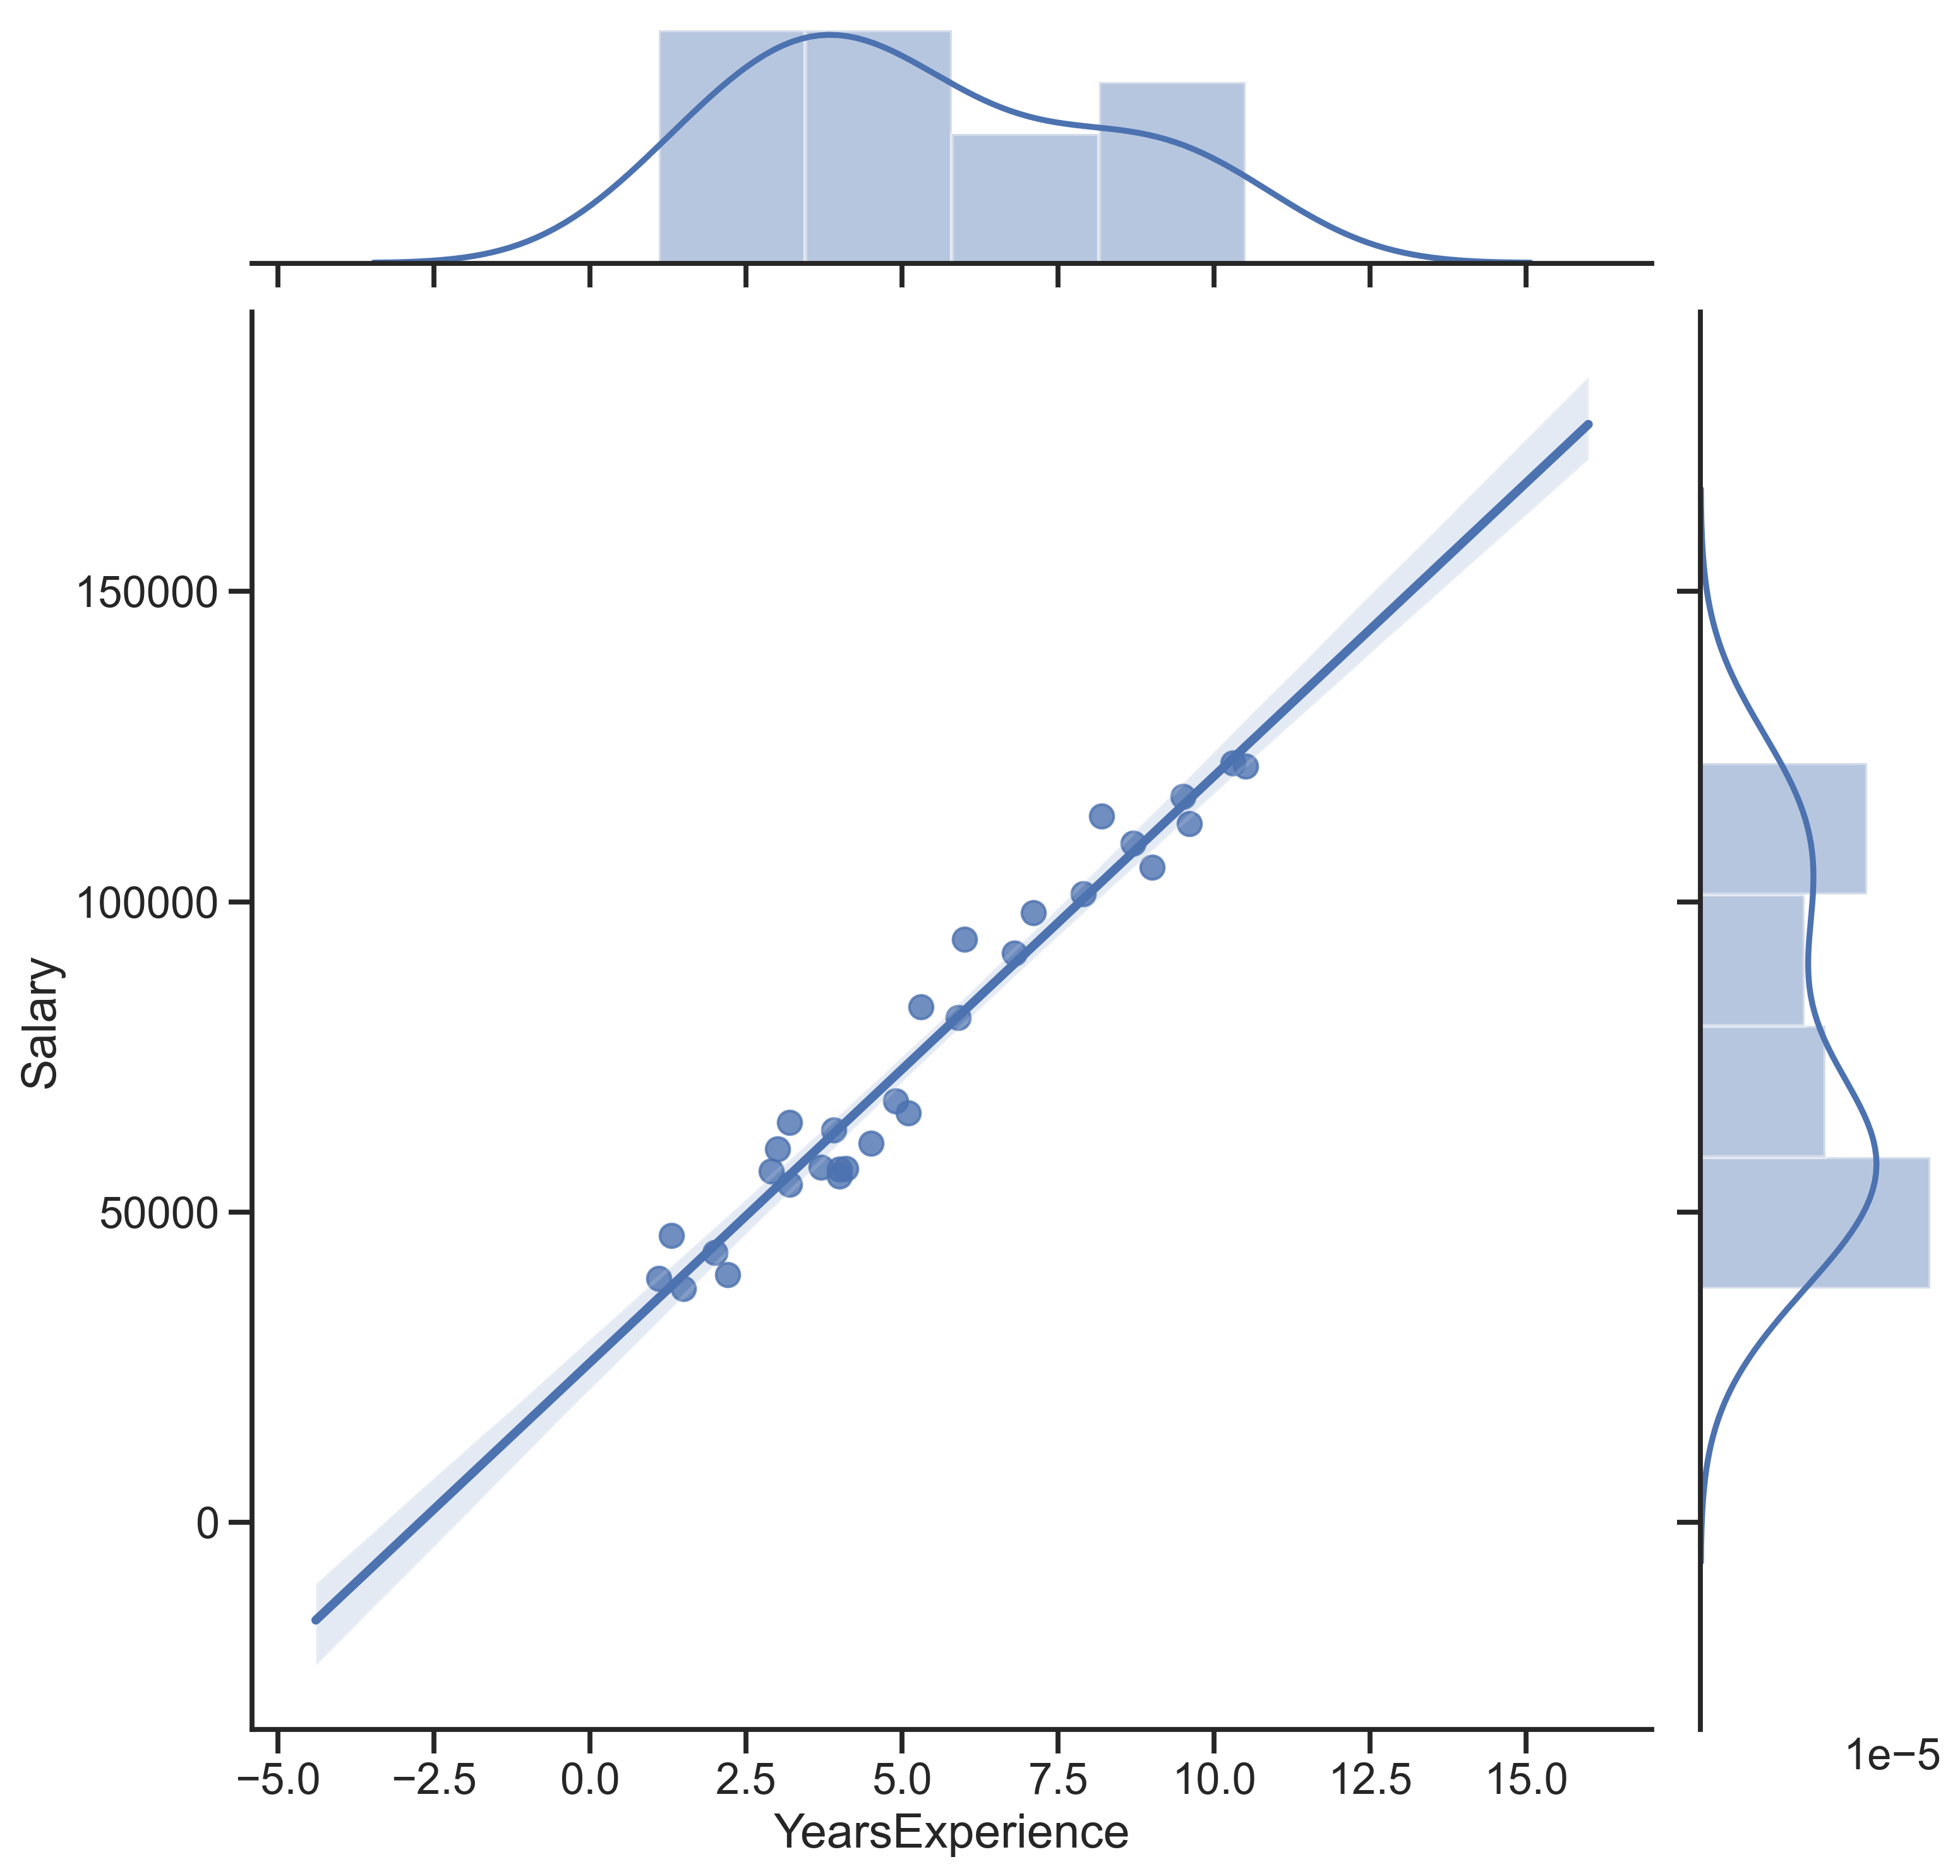

In [54]:
sns.jointplot(x="YearsExperience",y="Salary",data=df,height=10,kind="reg")
plt.show()

In [55]:
x = np.array(df["YearsExperience"])
y = np.array(df["Salary"])

In [56]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [57]:
x_constant = sm.add_constant(x)

In [58]:
model = sm.OLS(y,x_constant).fit()
model.predict(x_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           1.14e-20
Time:                        10:16:07   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
x1          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [60]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [61]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
y_pred = lm.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns = ["Predicted Salary"])
y_pred

,Predicted Salary
0,40748.961841
1,122699.622956
2,64961.657170
3,63099.142145
4,115249.562855
5,107799.502753


In [63]:
y_test = pd.DataFrame(y_test, columns = ["Actual Salary"])
y_test

,Actual Salary
0,37731.0
1,122391.0
2,57081.0
3,63218.0
4,116969.0
5,109431.0


In [64]:
y_test.mean()

Actual Salary    84470.166667
dtype: float64

In [65]:
lm.intercept_

array([73886.20833333])

In [66]:
lm.coef_

array([[24053.85556857]])

In [67]:
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
R2 = metrics.r2_score(y_test,y_pred)
lmmodelevaluation = [[MAE,MSE,RMSE,R2]]
lmmodelevaluationdata = pd.DataFrame(lmmodelevaluation, columns = ("MAE","MSE","RMSE","R2"))
lmmodelevaluationdata

,MAE,MSE,RMSE,R2
0,2446.172369,1.282341e+07,3580.979237,0.98817


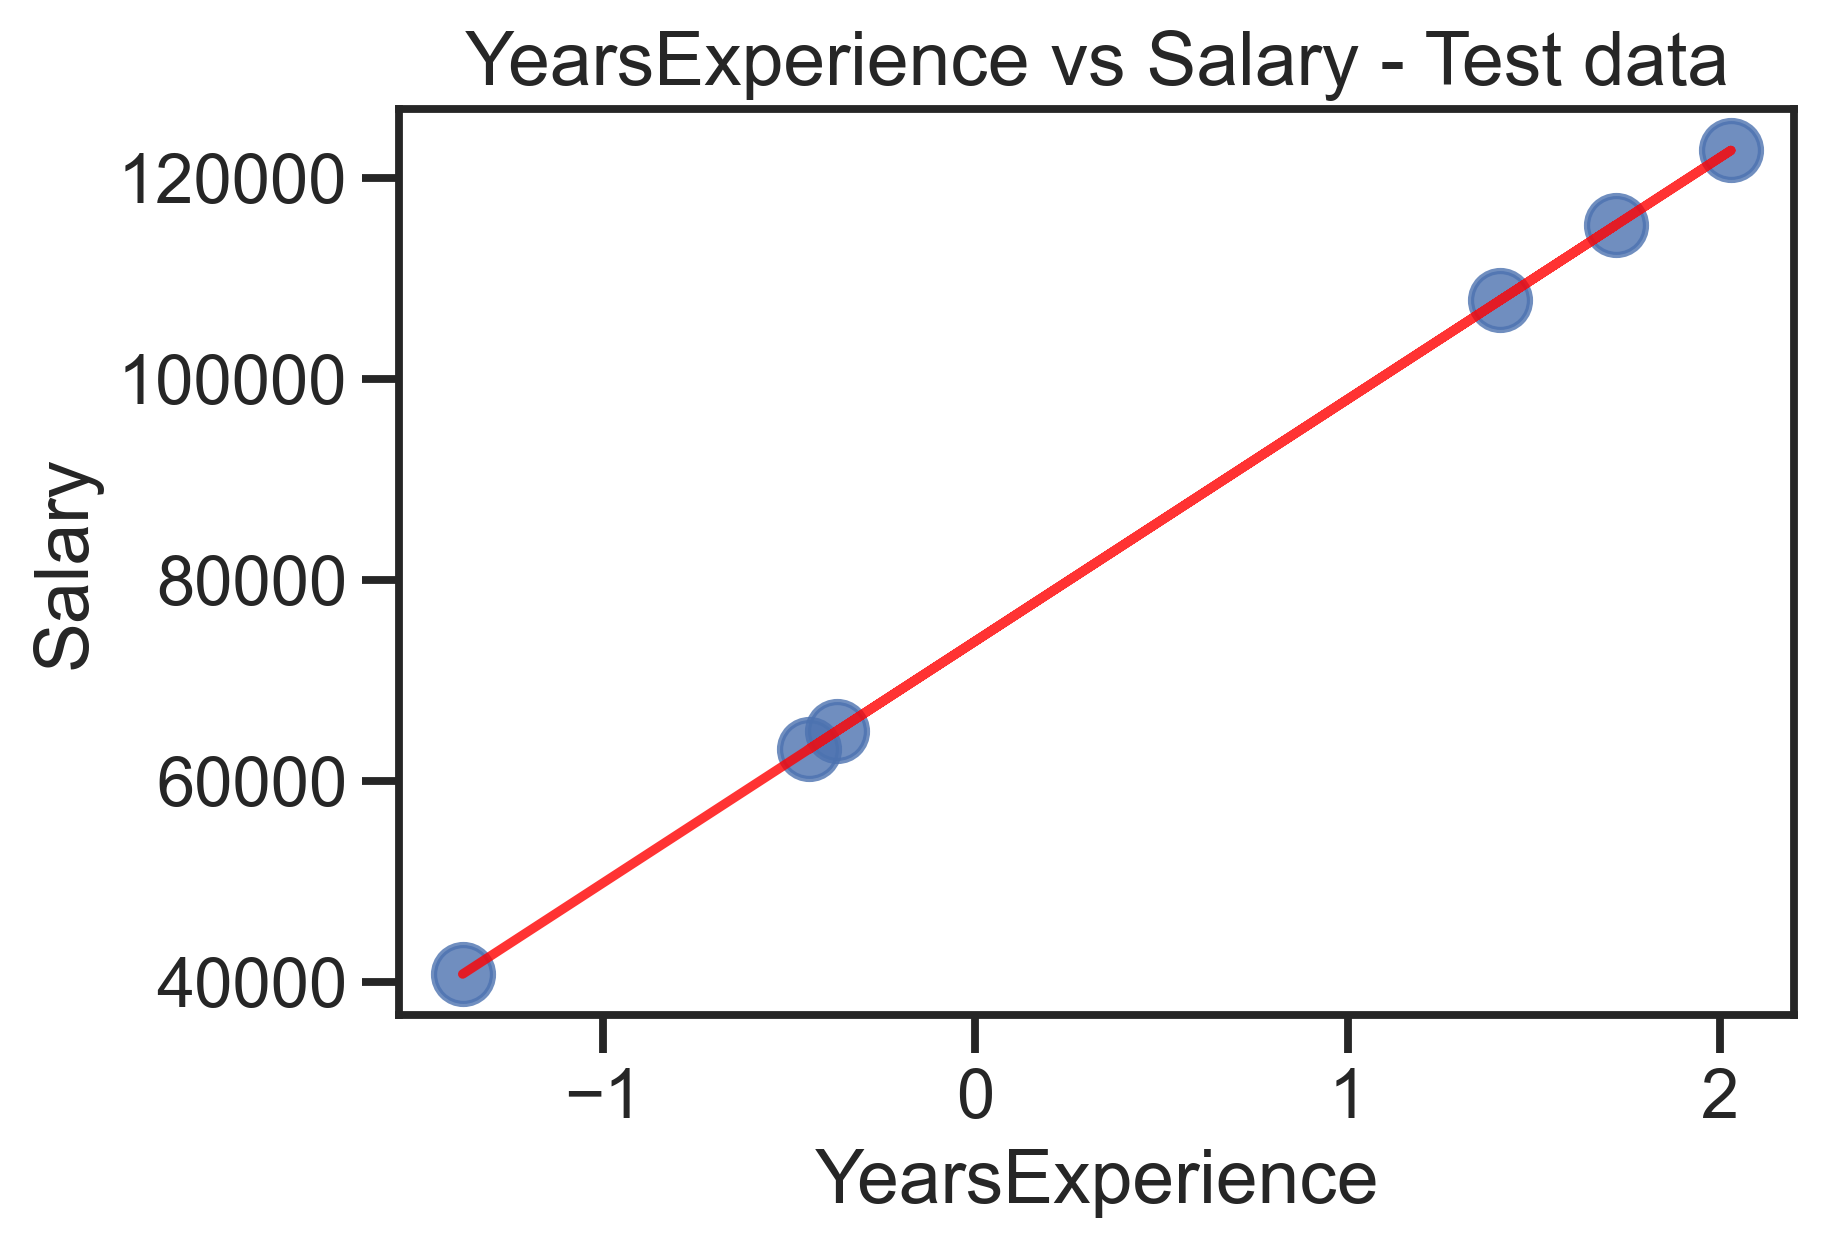

In [68]:
plt.scatter(x_test,y_pred,alpha=0.8,s=200)
plt.plot(x_test,y_pred,alpha=0.8,color="red")
plt.title("YearsExperience vs Salary - Test data")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

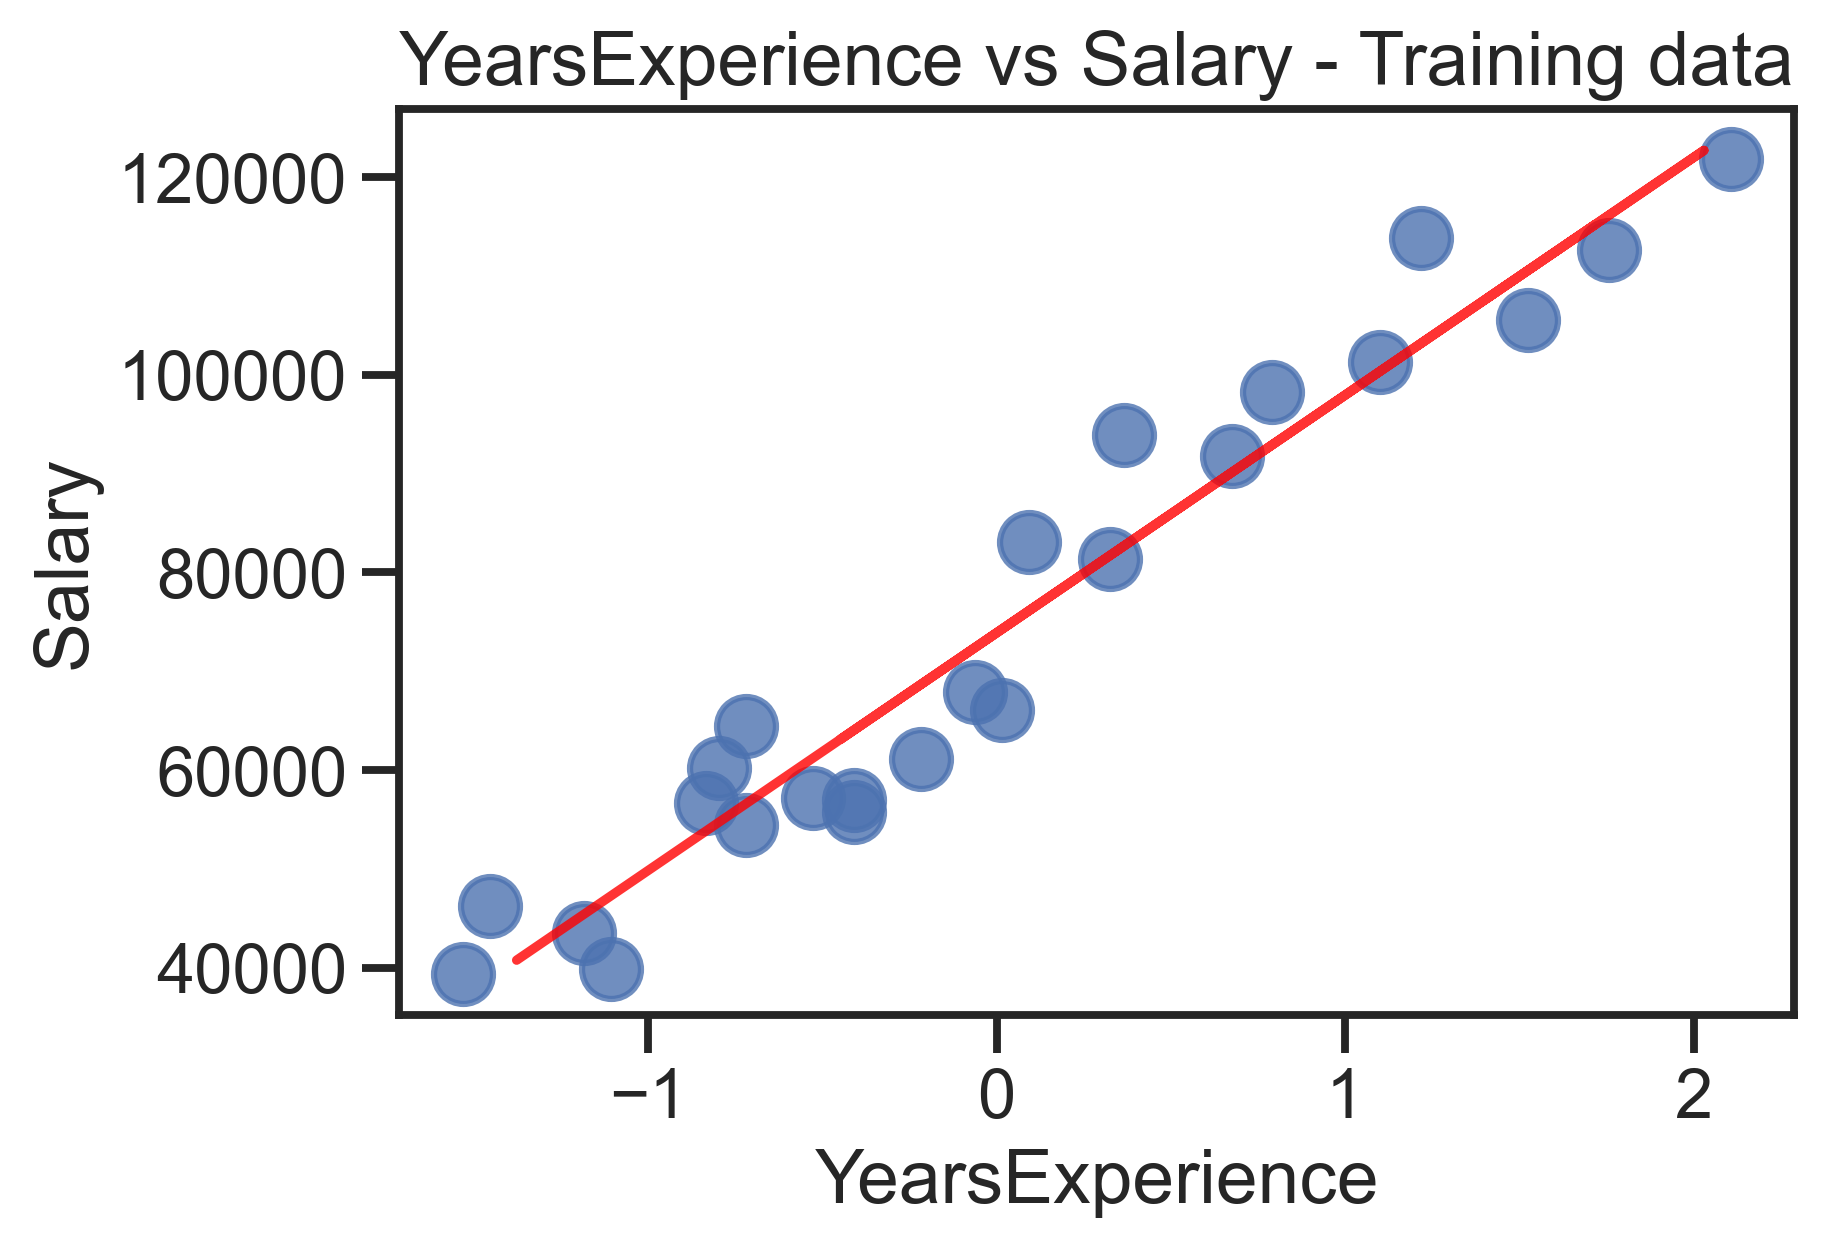

In [69]:
plt.scatter(x_train,y_train,alpha=0.8,s=200)
plt.plot(x_test,y_pred,alpha=0.8,color="red")
plt.title("YearsExperience vs Salary - Training data")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

In [70]:
residual = y_test - y_pred
model_residual = model.resid
model_fitted = model.fittedvalues
model_leverage = model.get_influence().hat_matrix_diag
model_norm_residual = model.get_influence().resid_studentized_internal
model_norm_residual_ab_sqrt = np.sqrt(np.abs(model_norm_residual))

In [71]:
np.mean(model_residual)

-1.5036979069312415e-11

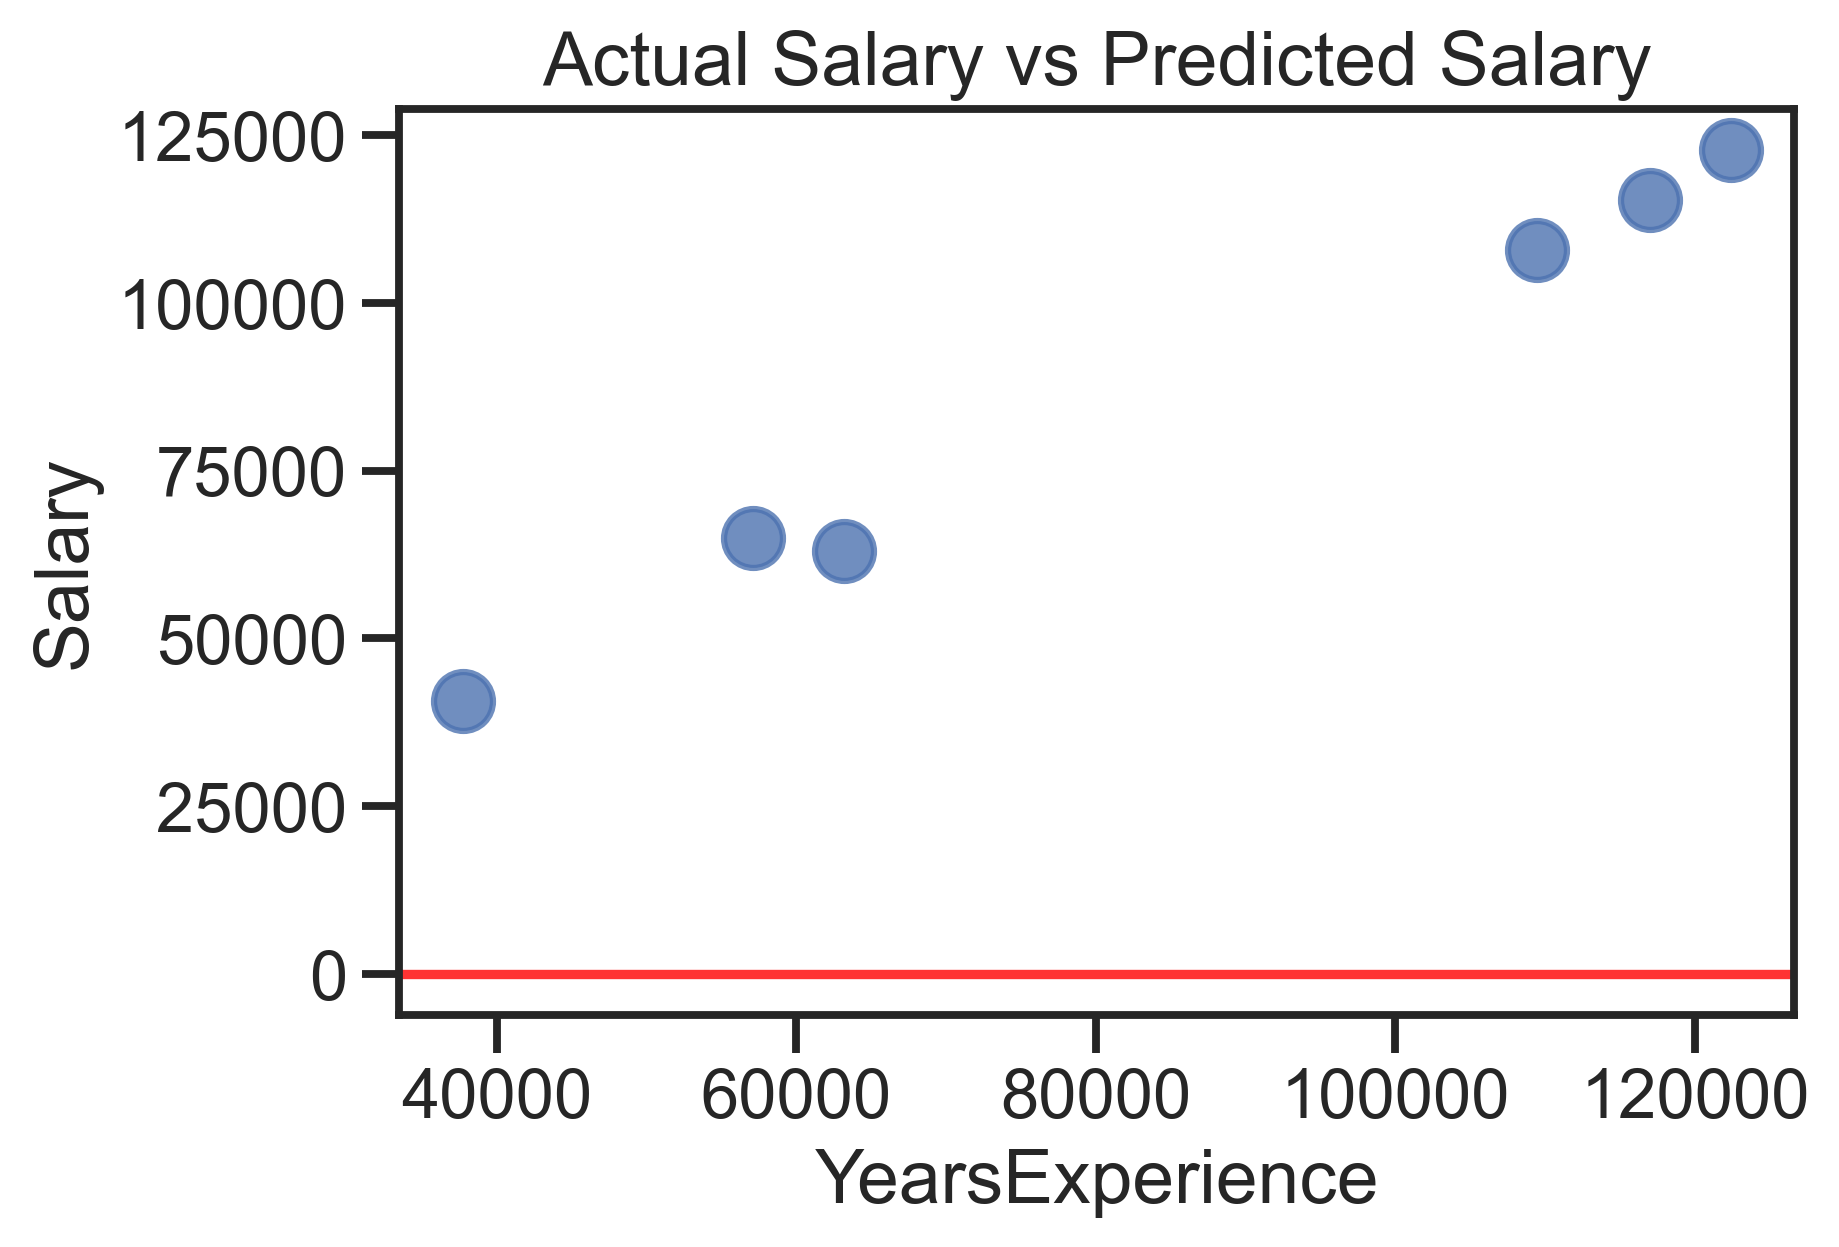

In [72]:
plt.scatter(y_test,y_pred,alpha=0.8,s=200)
plt.axhline(alpha=0.8,color="red")
plt.title("Actual Salary vs Predicted Salary")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

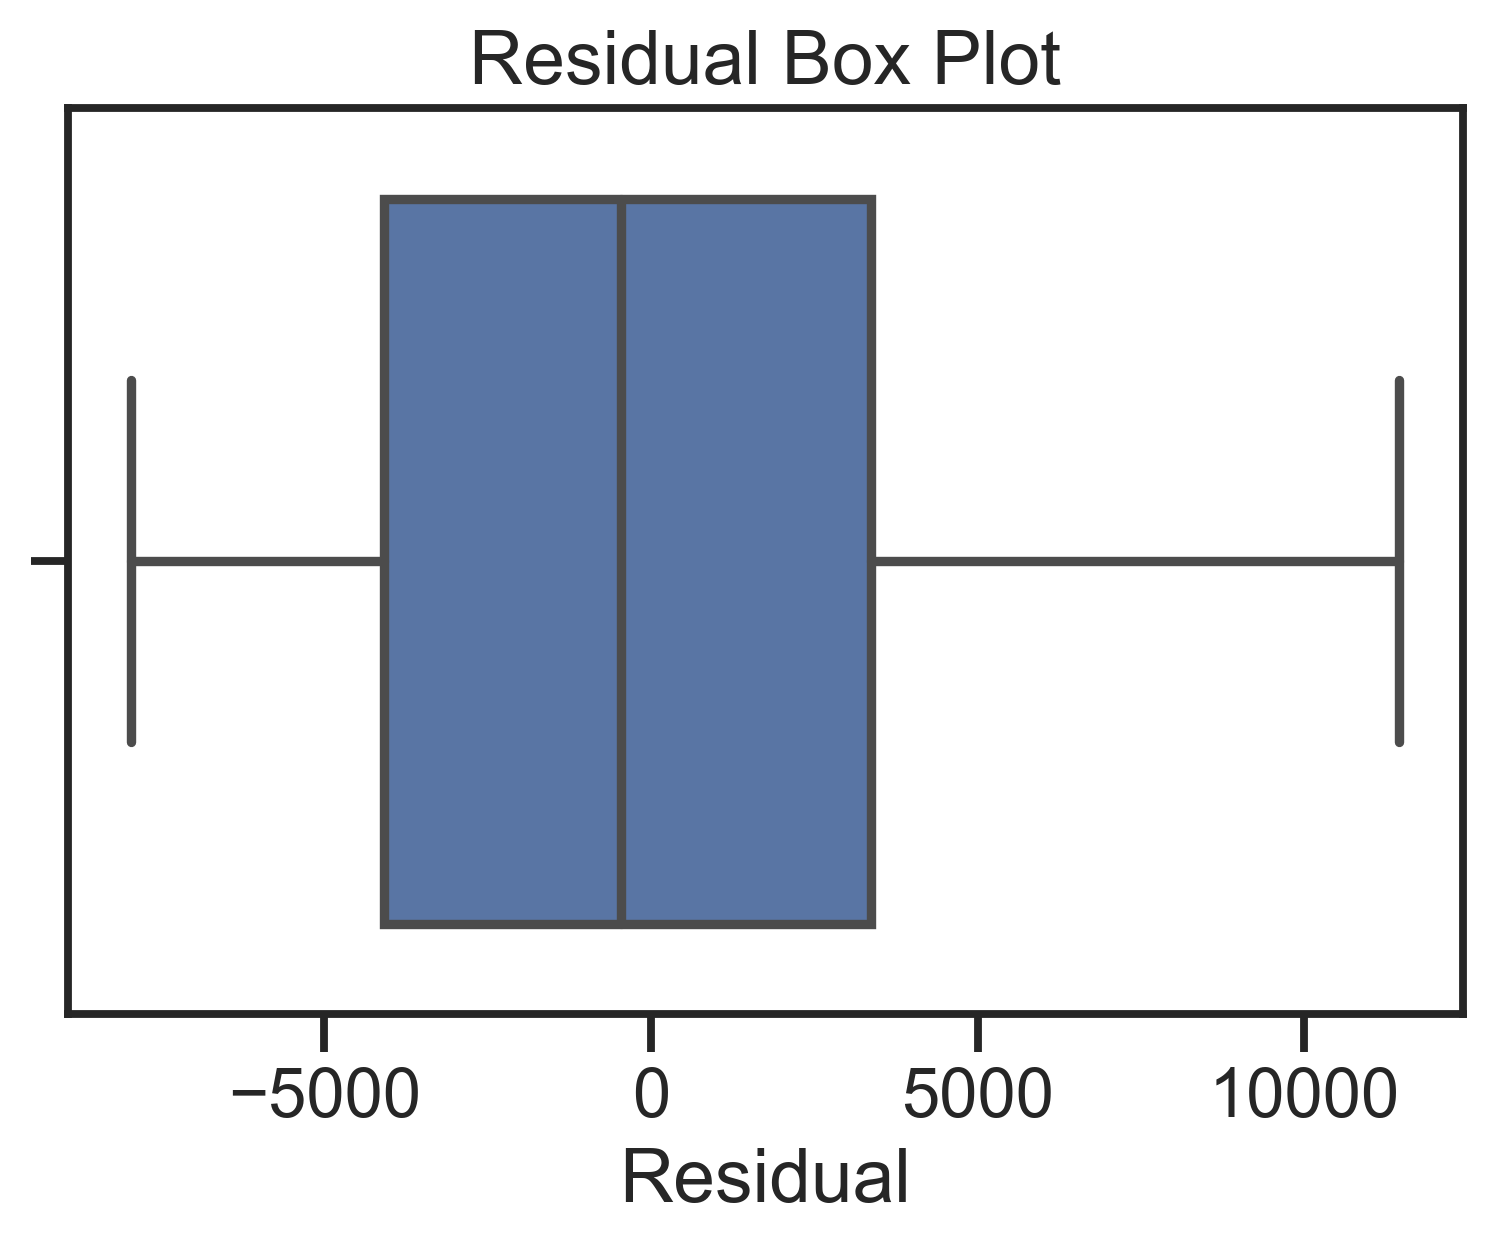

In [73]:
model_residual = pd.DataFrame(model_residual)
model_residual.columns = ["Residual"]
sns.boxplot(model_residual["Residual"])
plt.title("Residual Box Plot")
plt.show()

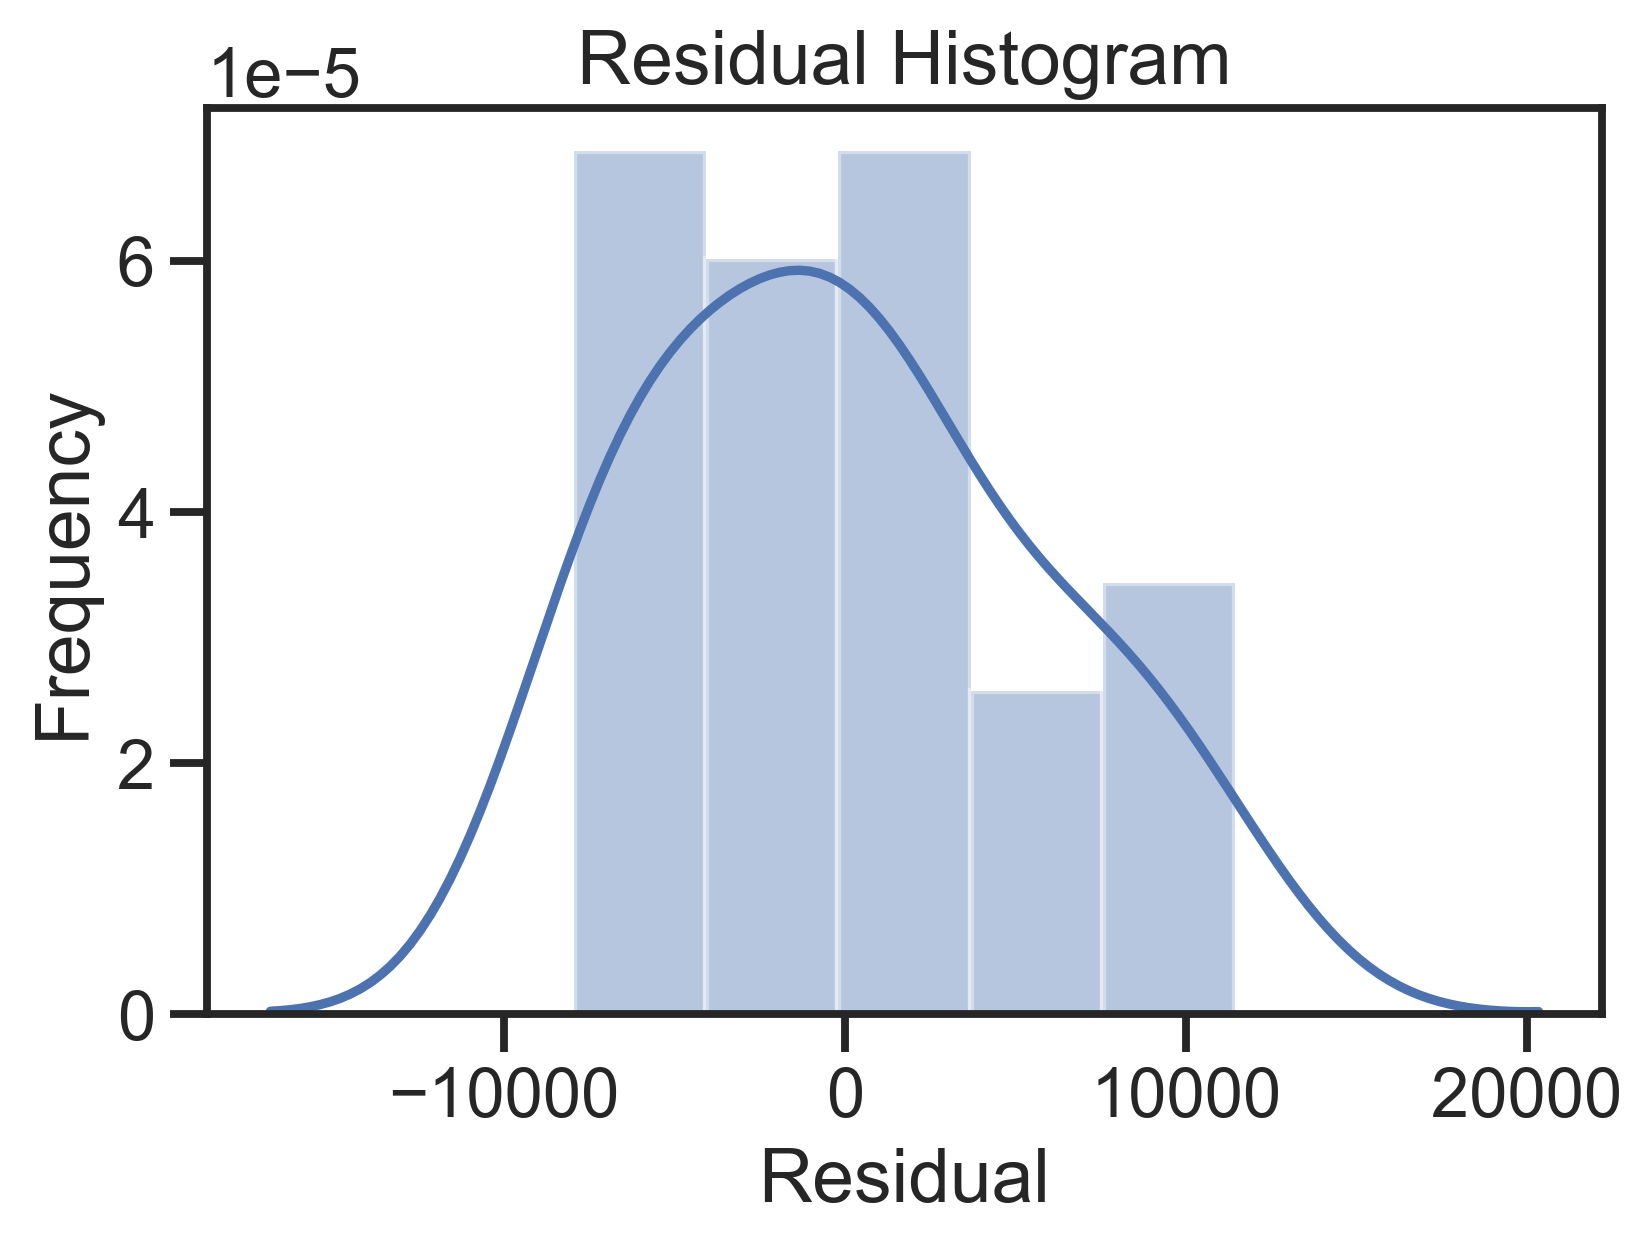

In [74]:
sns.distplot(model_residual["Residual"])
plt.title("Residual Histogram")
plt.ylabel("Frequency")
plt.show()

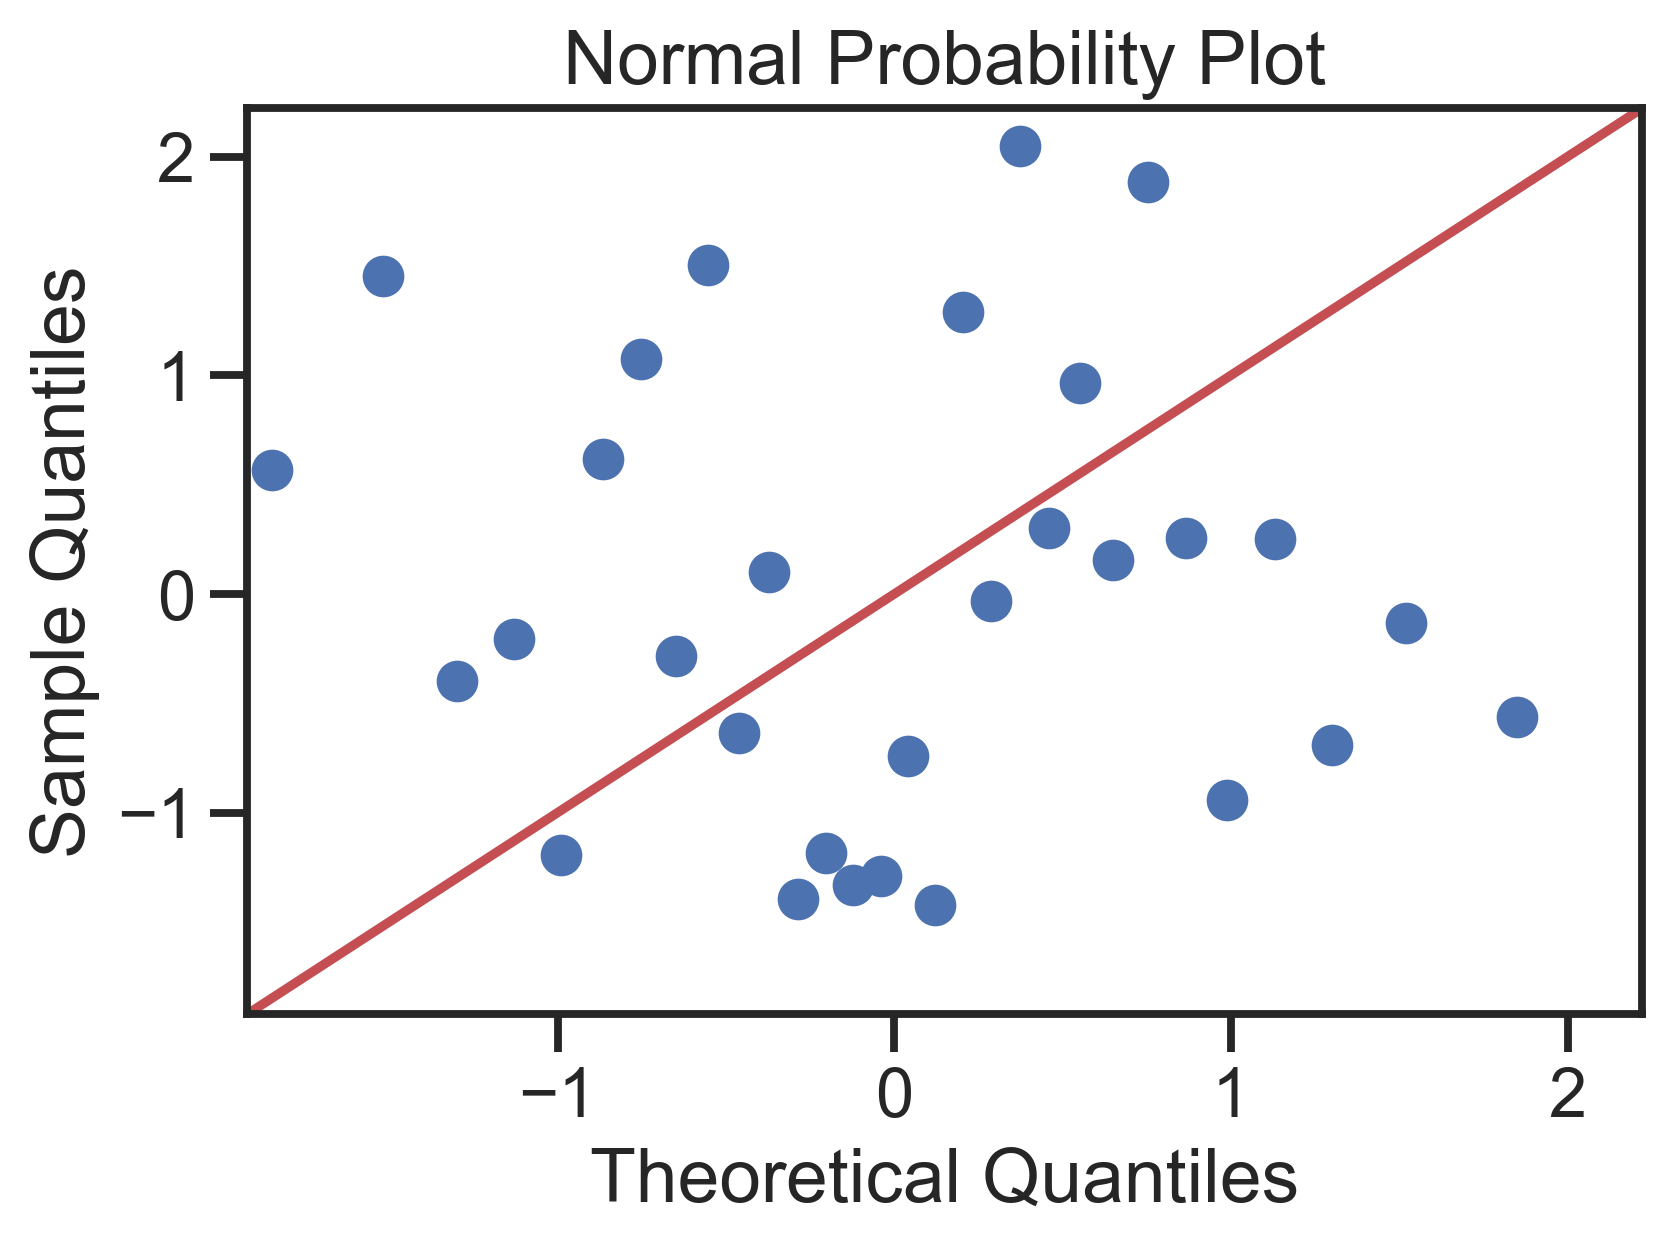

In [78]:
fig, ax = plt.subplots()
fig = sm.graphics.qqplot(model_residual,ax=ax,line="45",fit=True,dist=stats.norm)
plt.title("Normal Probability Plot")
plt.show()

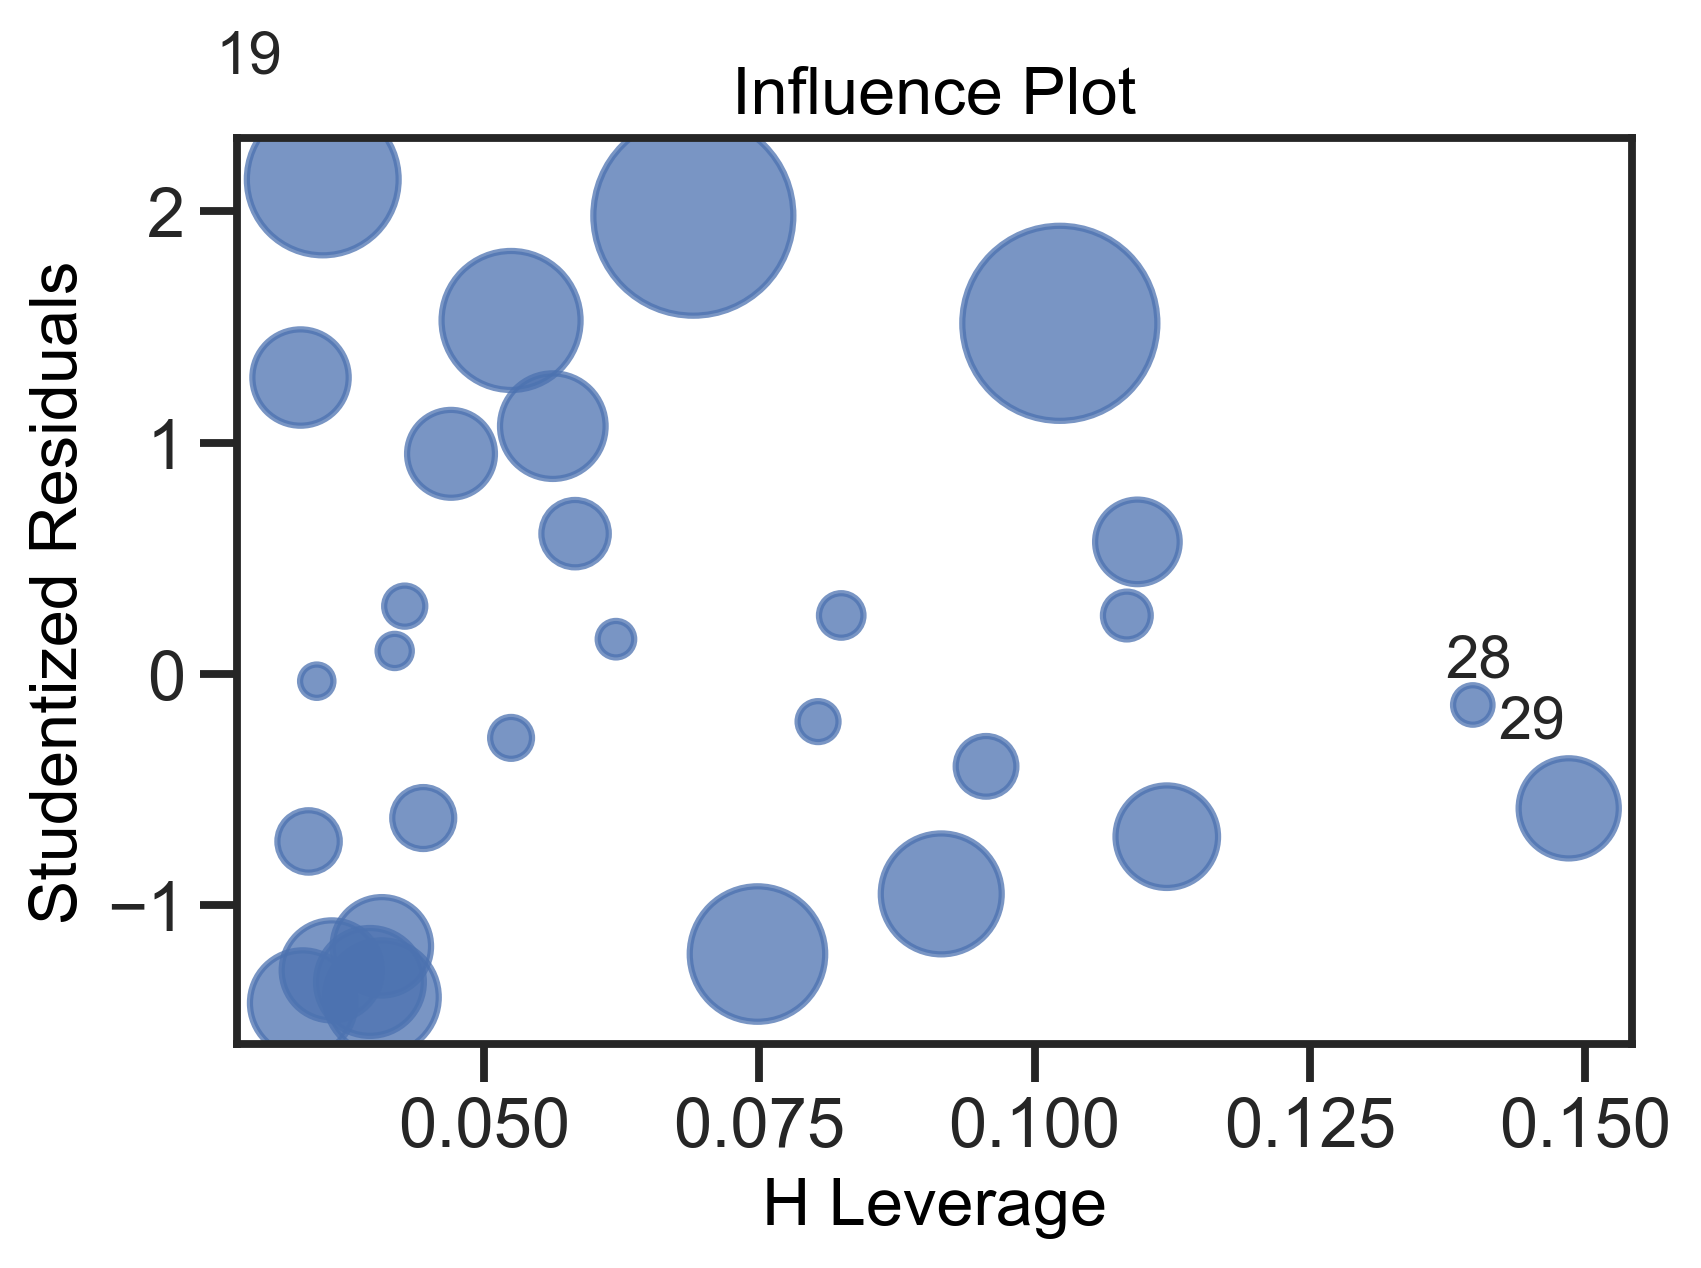

In [81]:
fig, ax = plt.subplots()
fig = sm.graphics.influence_plot(model,ax=ax,criterion="cooks")
plt.show()

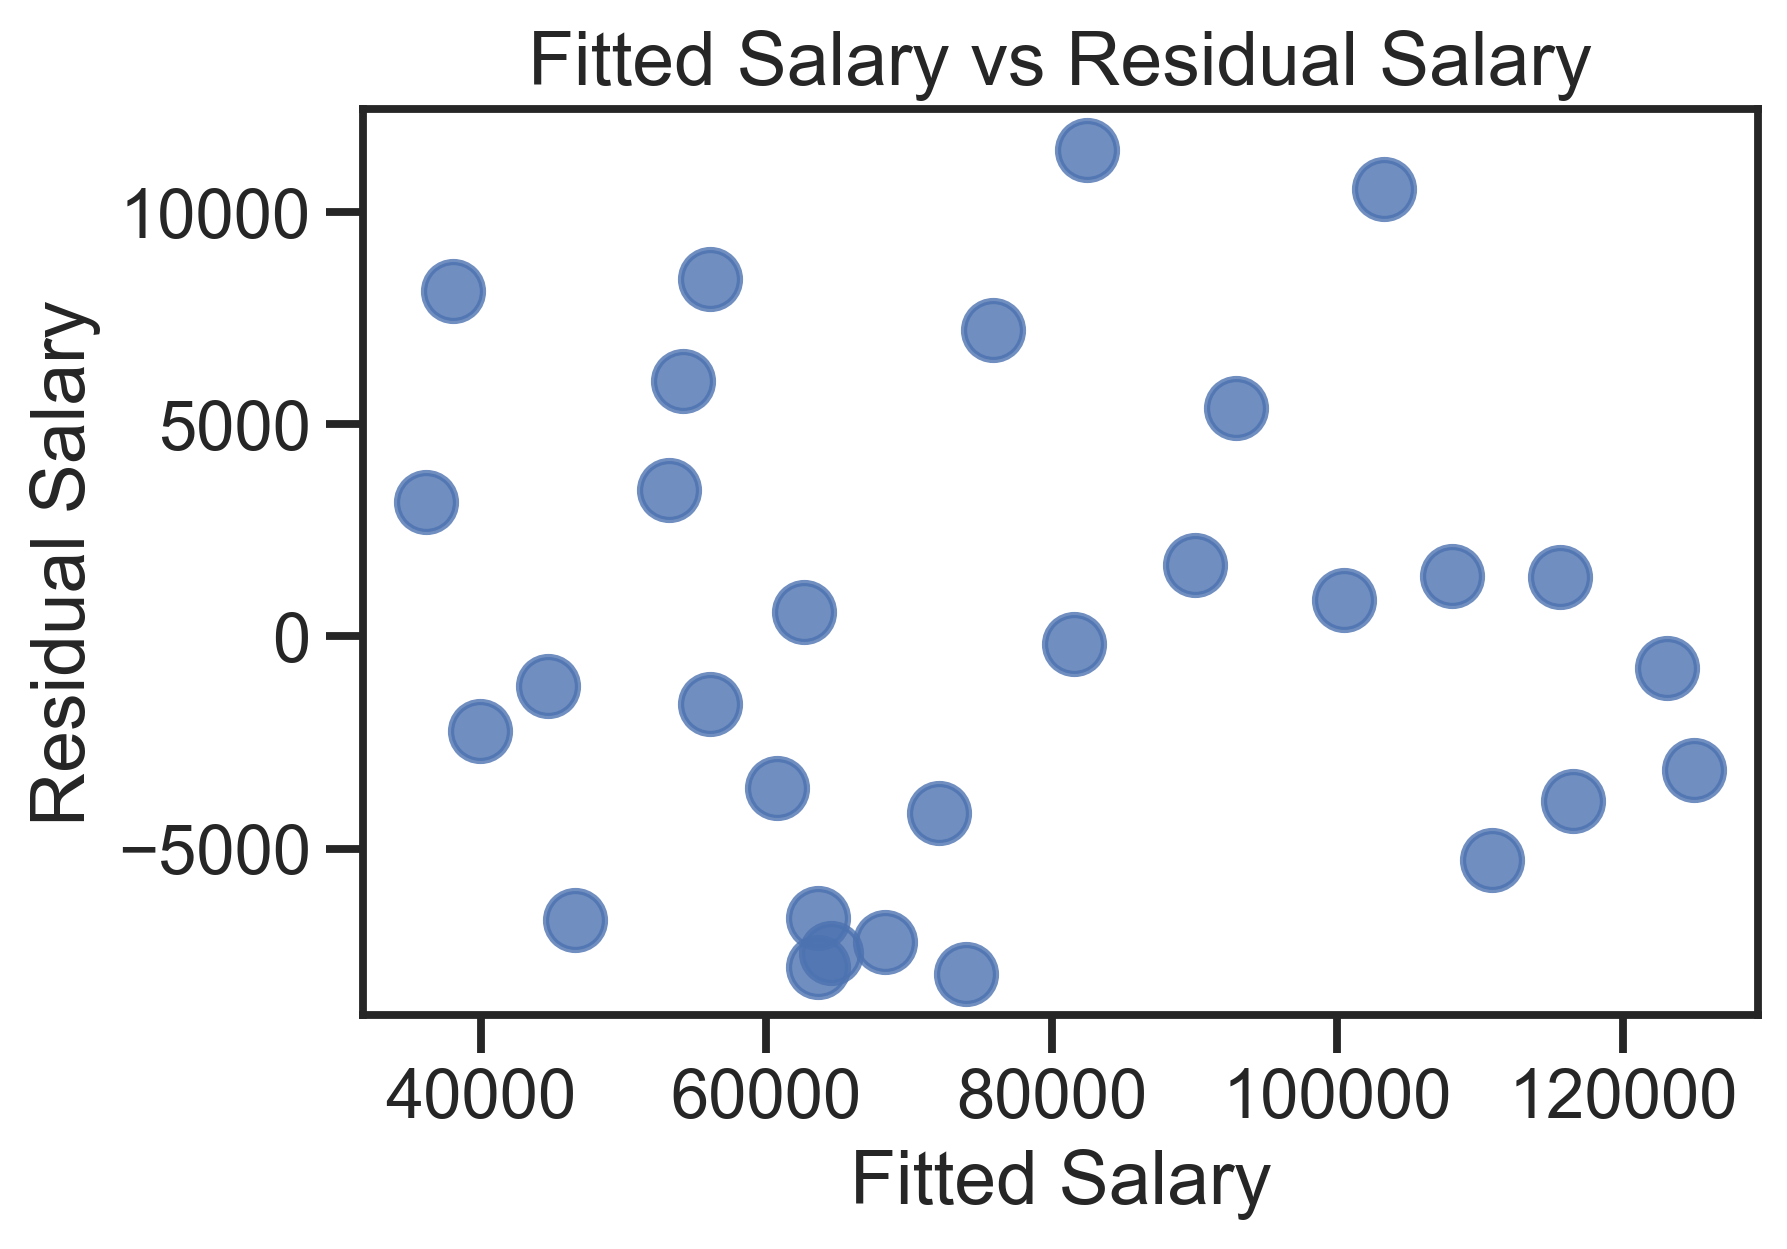

In [82]:
plt.scatter(model_fitted,model_residual,alpha=0.8,s=200)
plt.title("Fitted Salary vs Residual Salary")
plt.xlabel("Fitted Salary")
plt.ylabel("Residual Salary")
plt.show()

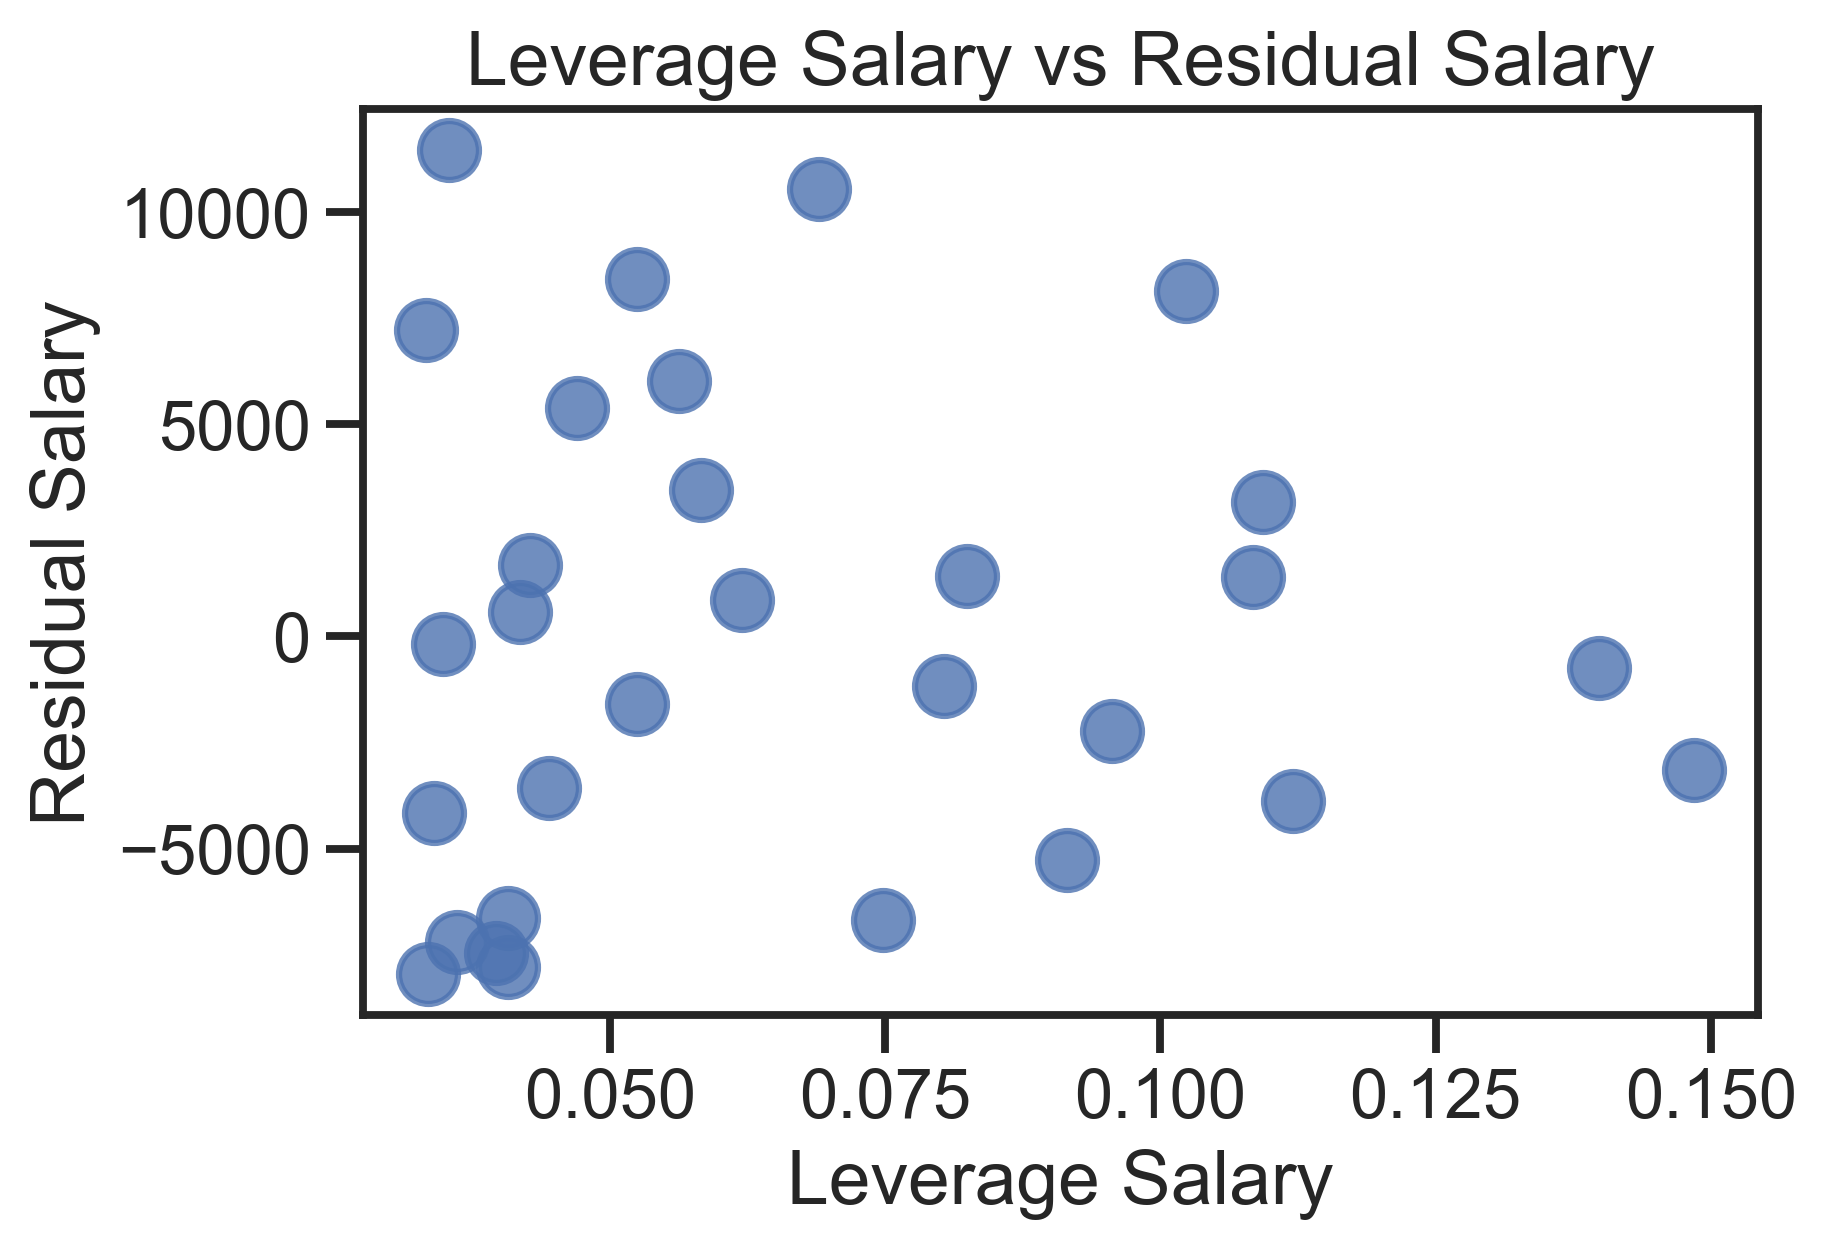

In [83]:
plt.scatter(model_leverage,model_residual,alpha=0.8,s=200)
plt.title("Leverage Salary vs Residual Salary")
plt.xlabel("Leverage Salary")
plt.ylabel("Residual Salary")
plt.show()

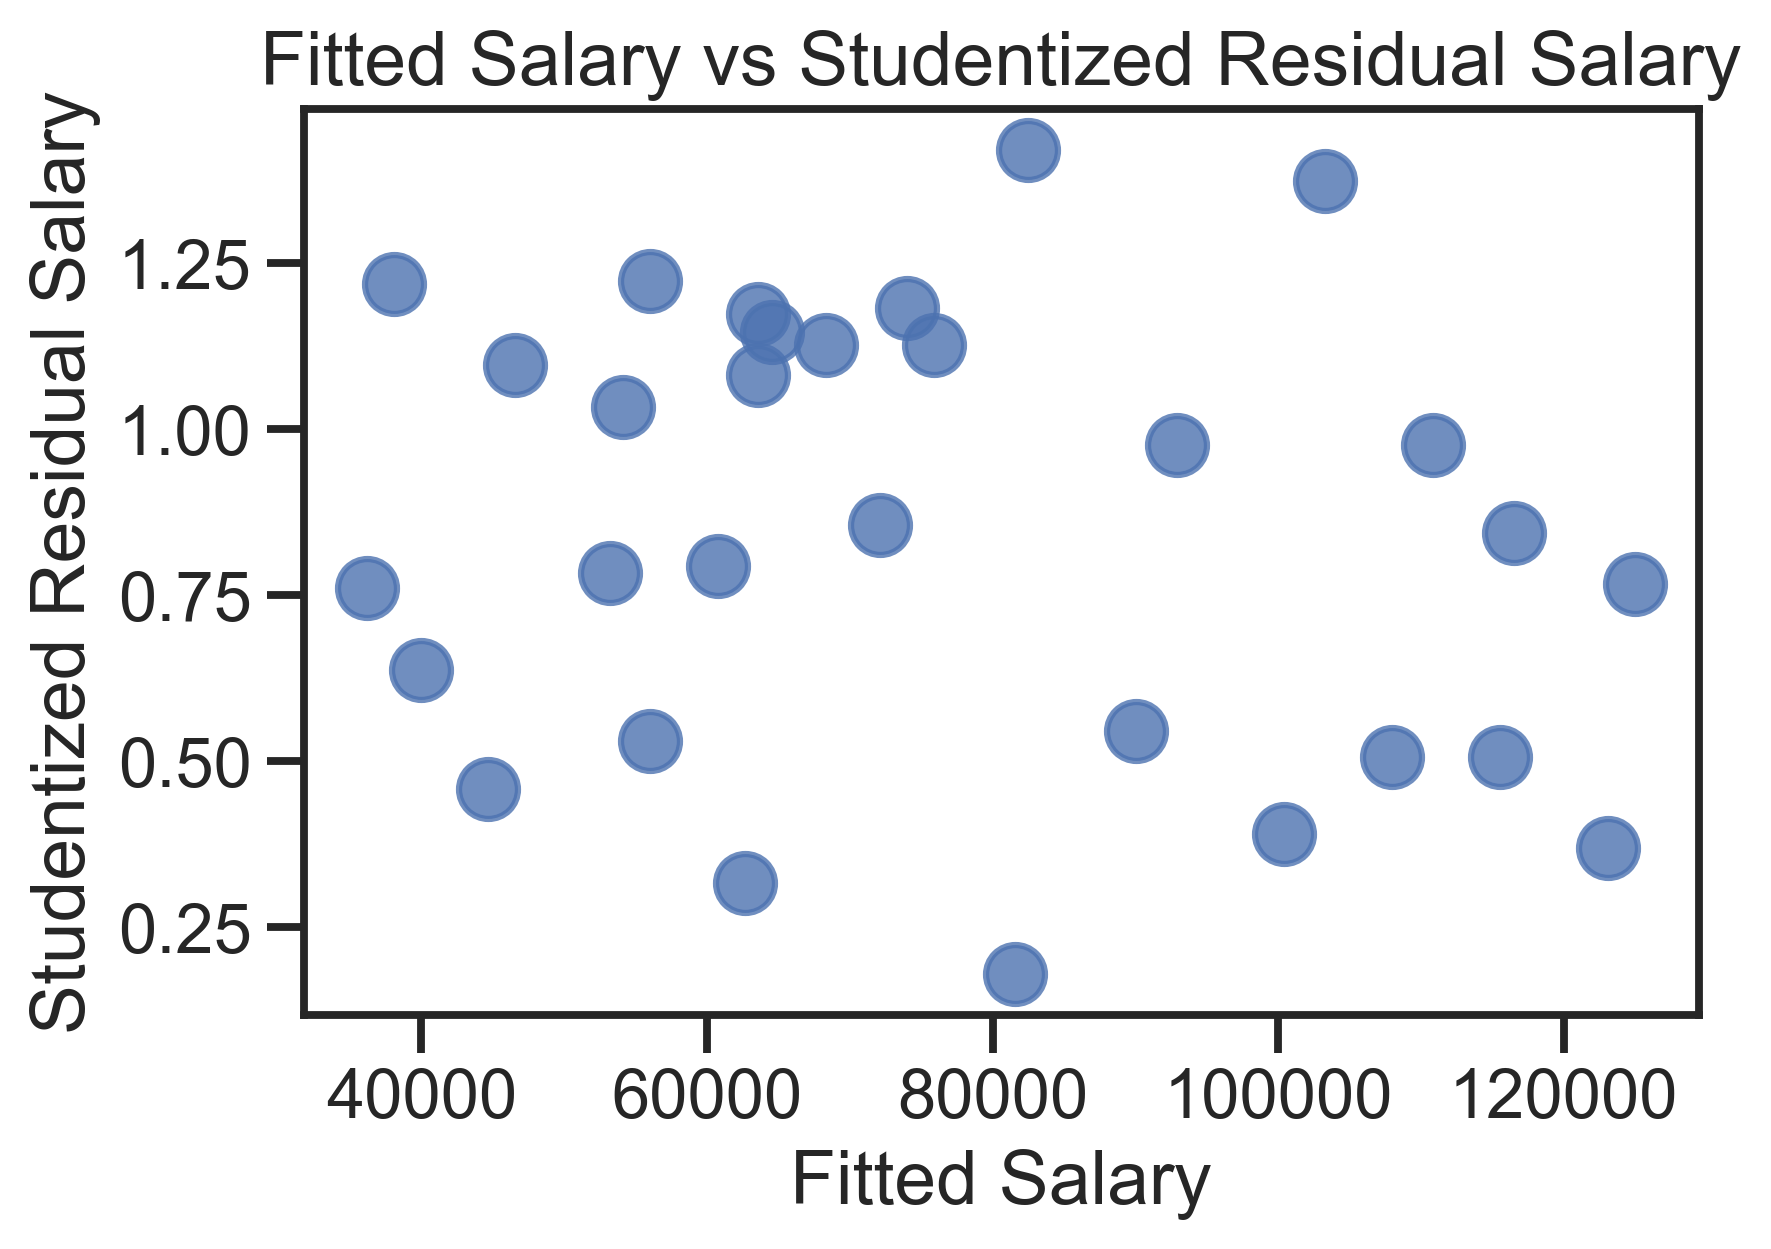

In [84]:
plt.scatter(model_fitted,model_norm_residual_ab_sqrt,alpha=0.8,s=200)
plt.title("Fitted Salary vs Studentized Residual Salary")
plt.xlabel("Fitted Salary")
plt.ylabel("Studentized Residual Salary")
plt.show()

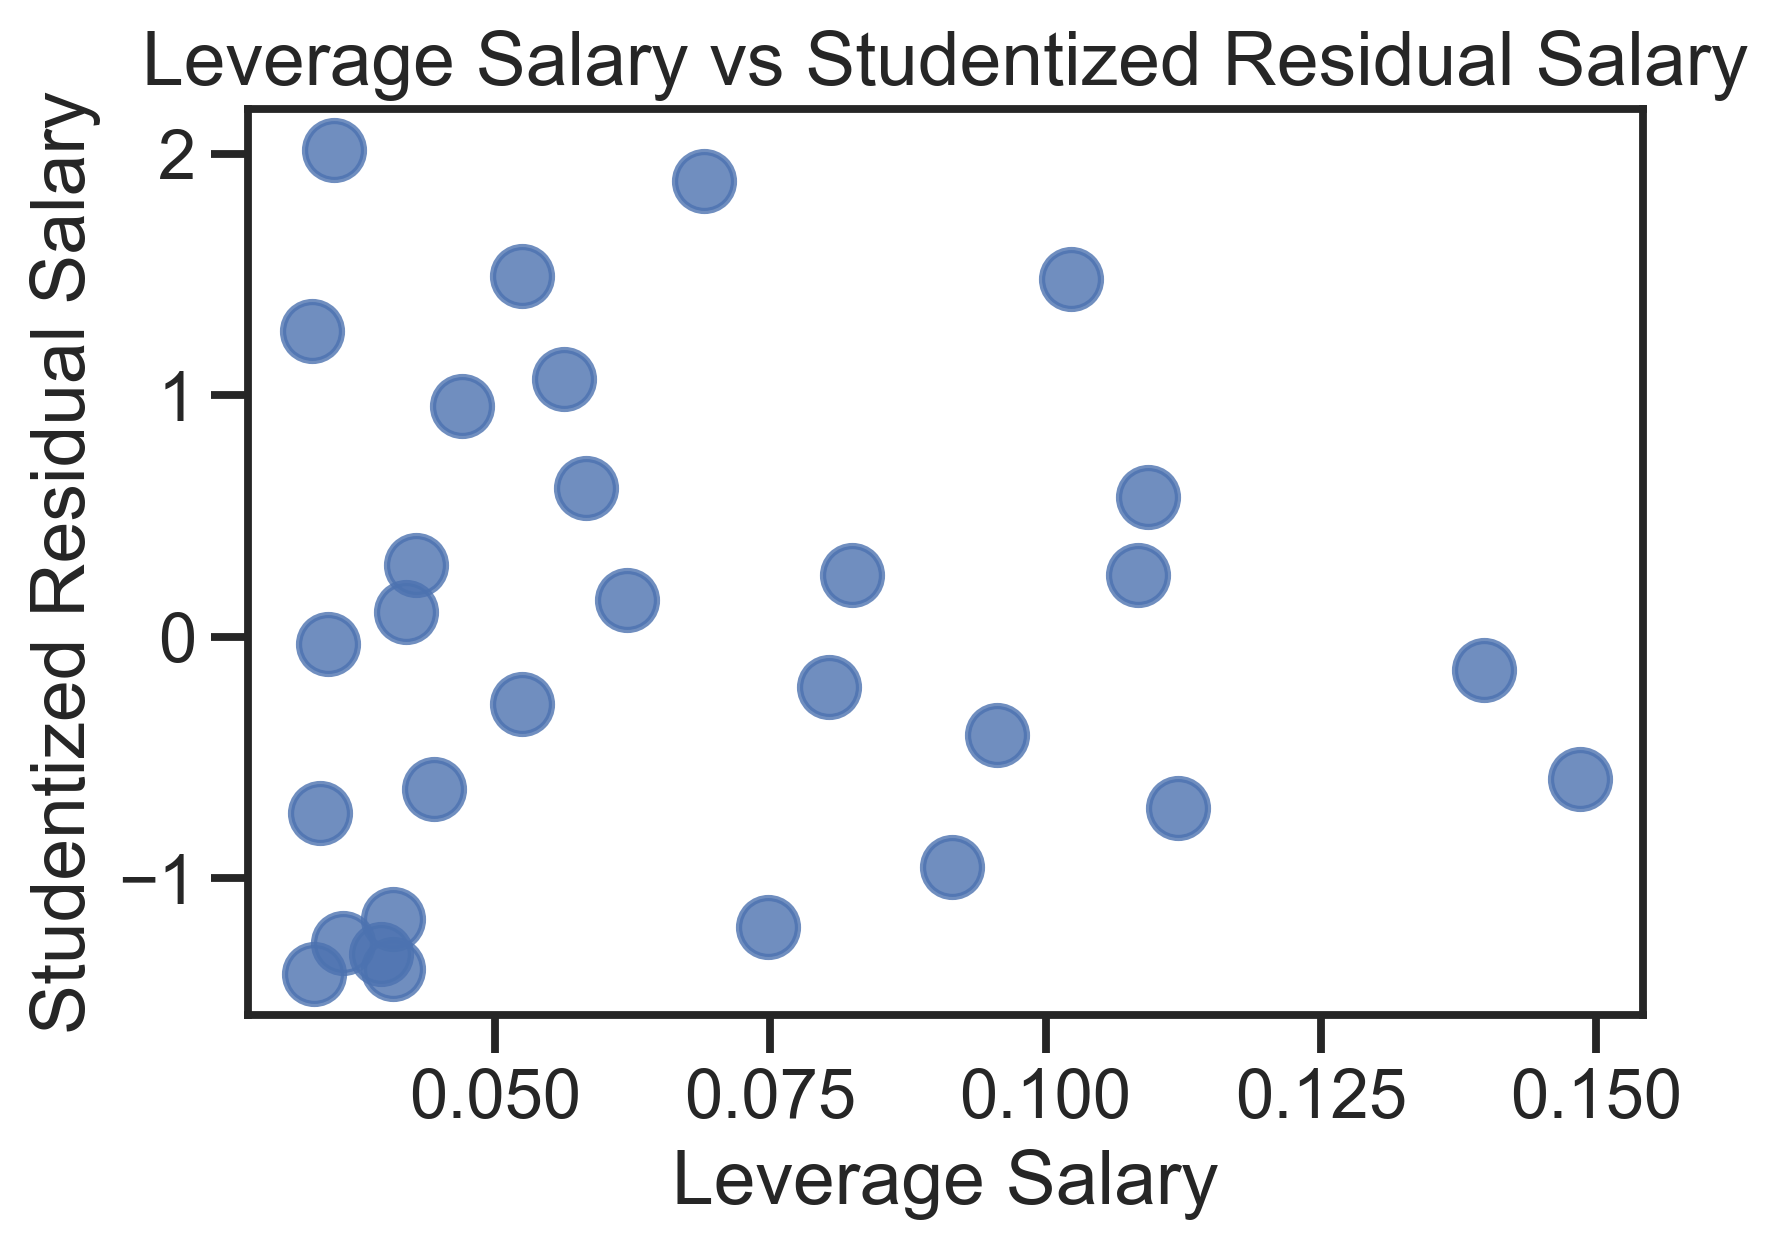

In [85]:
plt.scatter(model_leverage,model_norm_residual,alpha=0.8,s=200)
plt.title("Leverage Salary vs Studentized Residual Salary")
plt.xlabel("Leverage Salary")
plt.ylabel("Studentized Residual Salary")
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


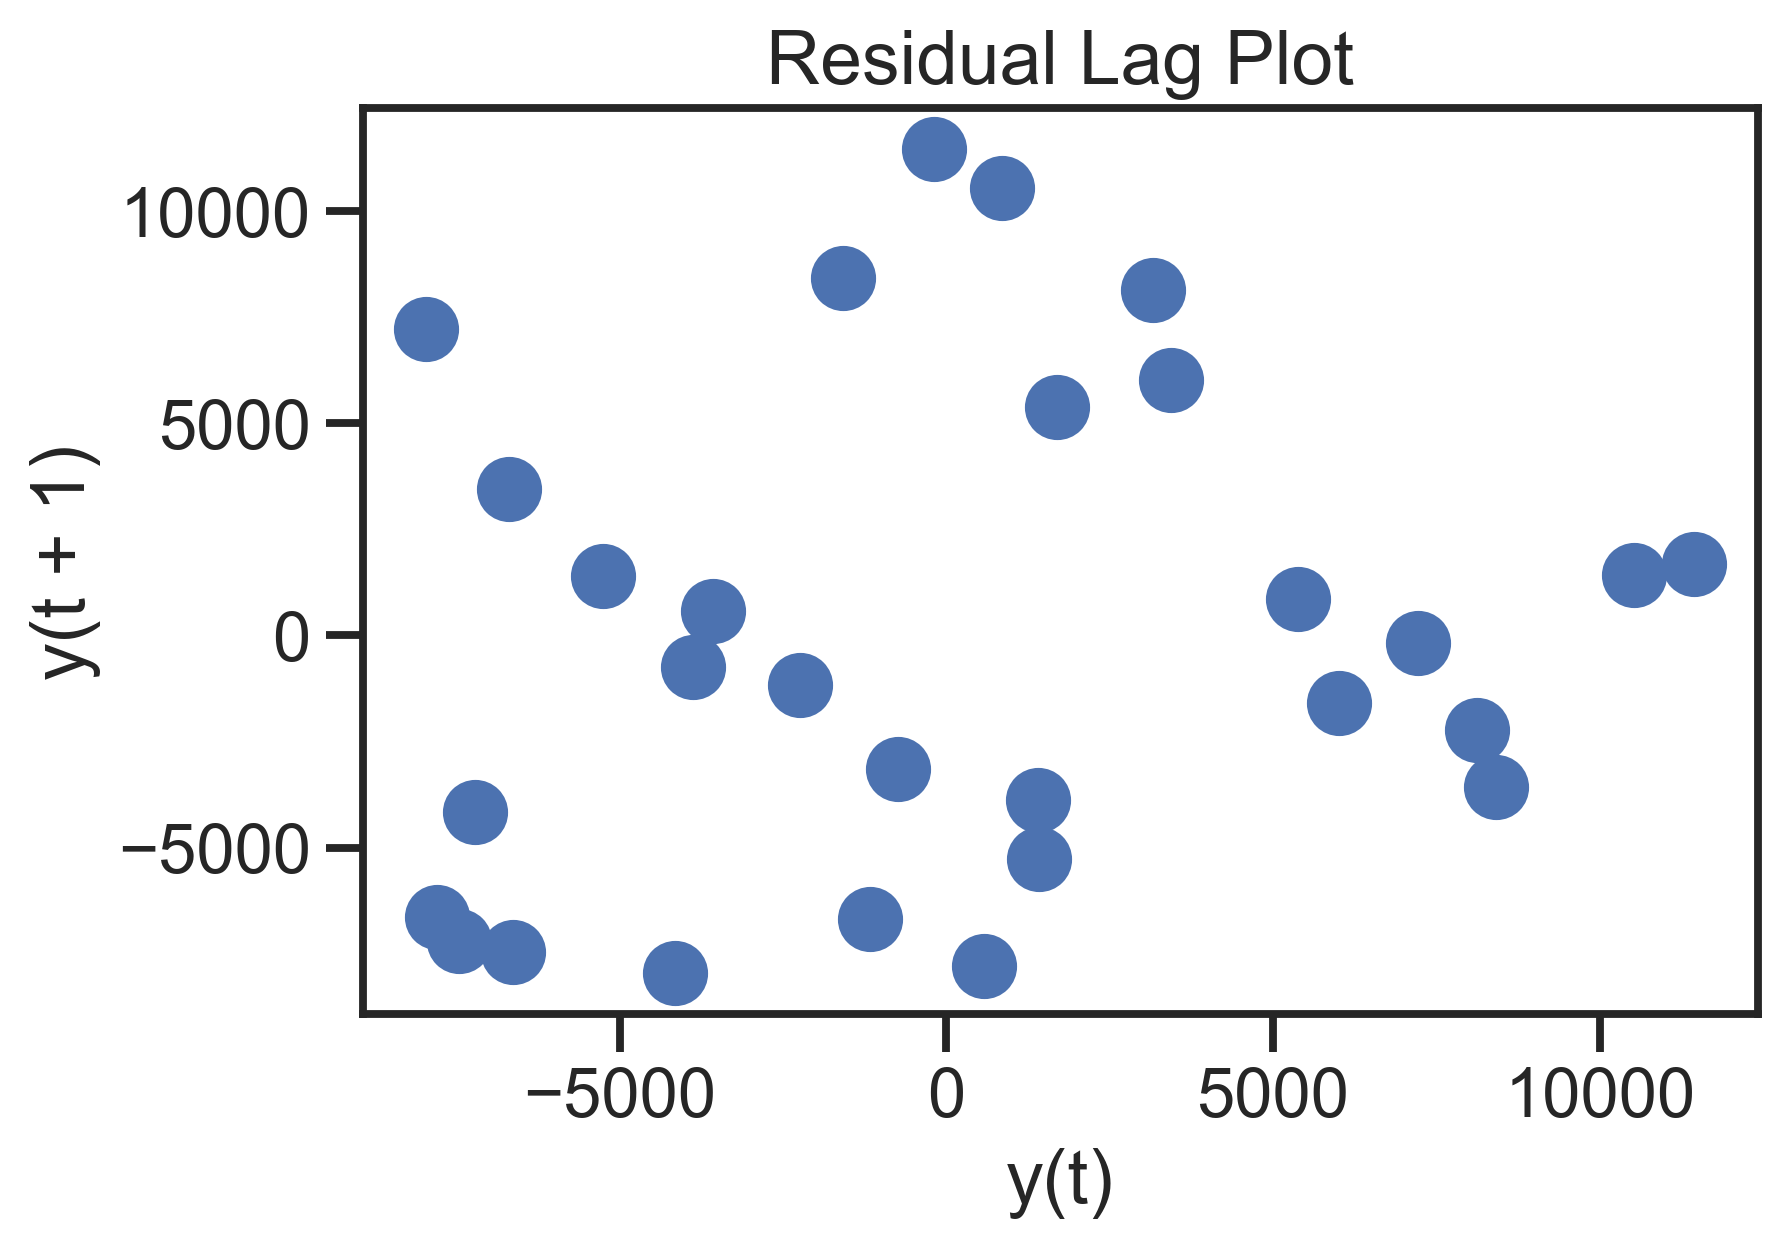

In [89]:
lag_plot(model_residual["Residual"],s=200)
plt.title("Residual Lag Plot")
plt.show()


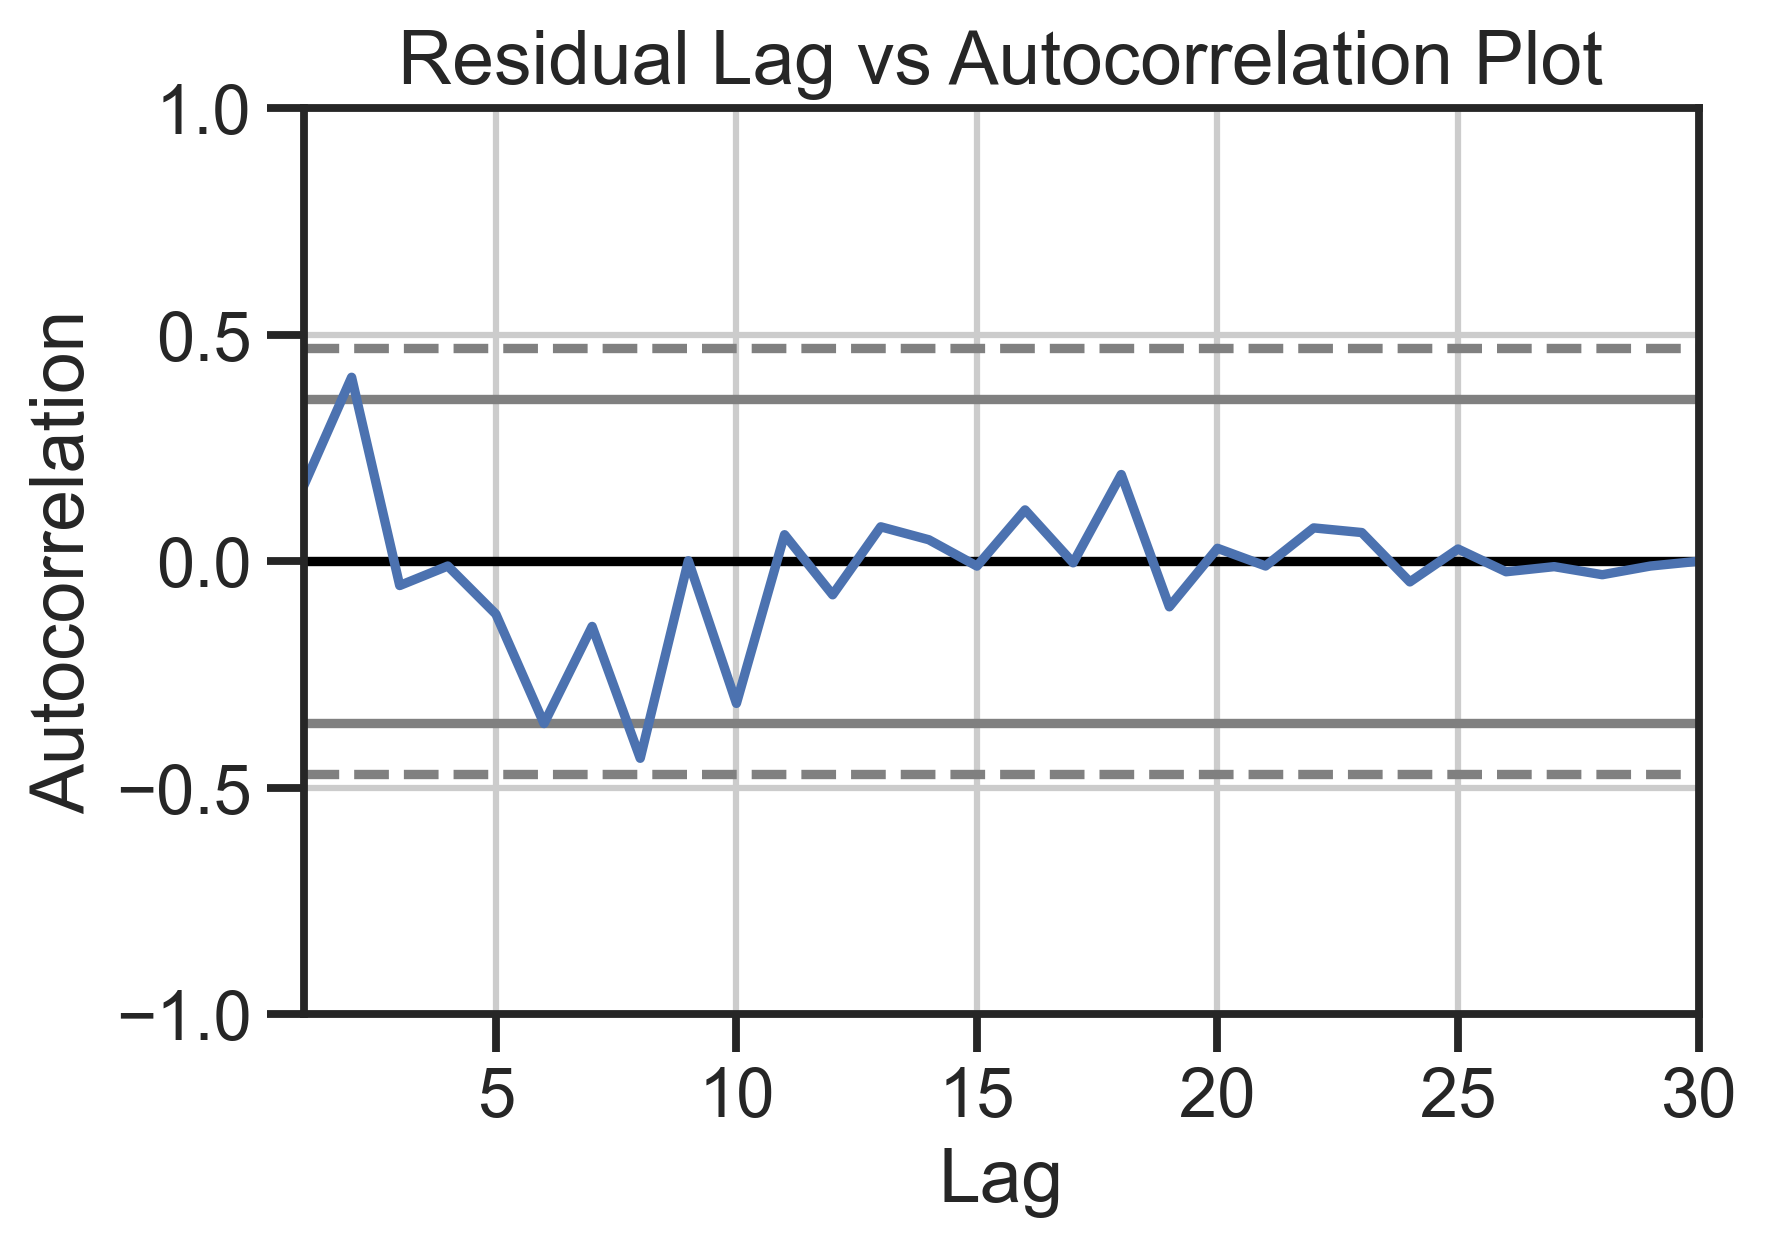

In [90]:
autocorrelation_plot(model_residual["Residual"])
plt.title("Residual Lag vs Autocorrelation Plot")
plt.show()

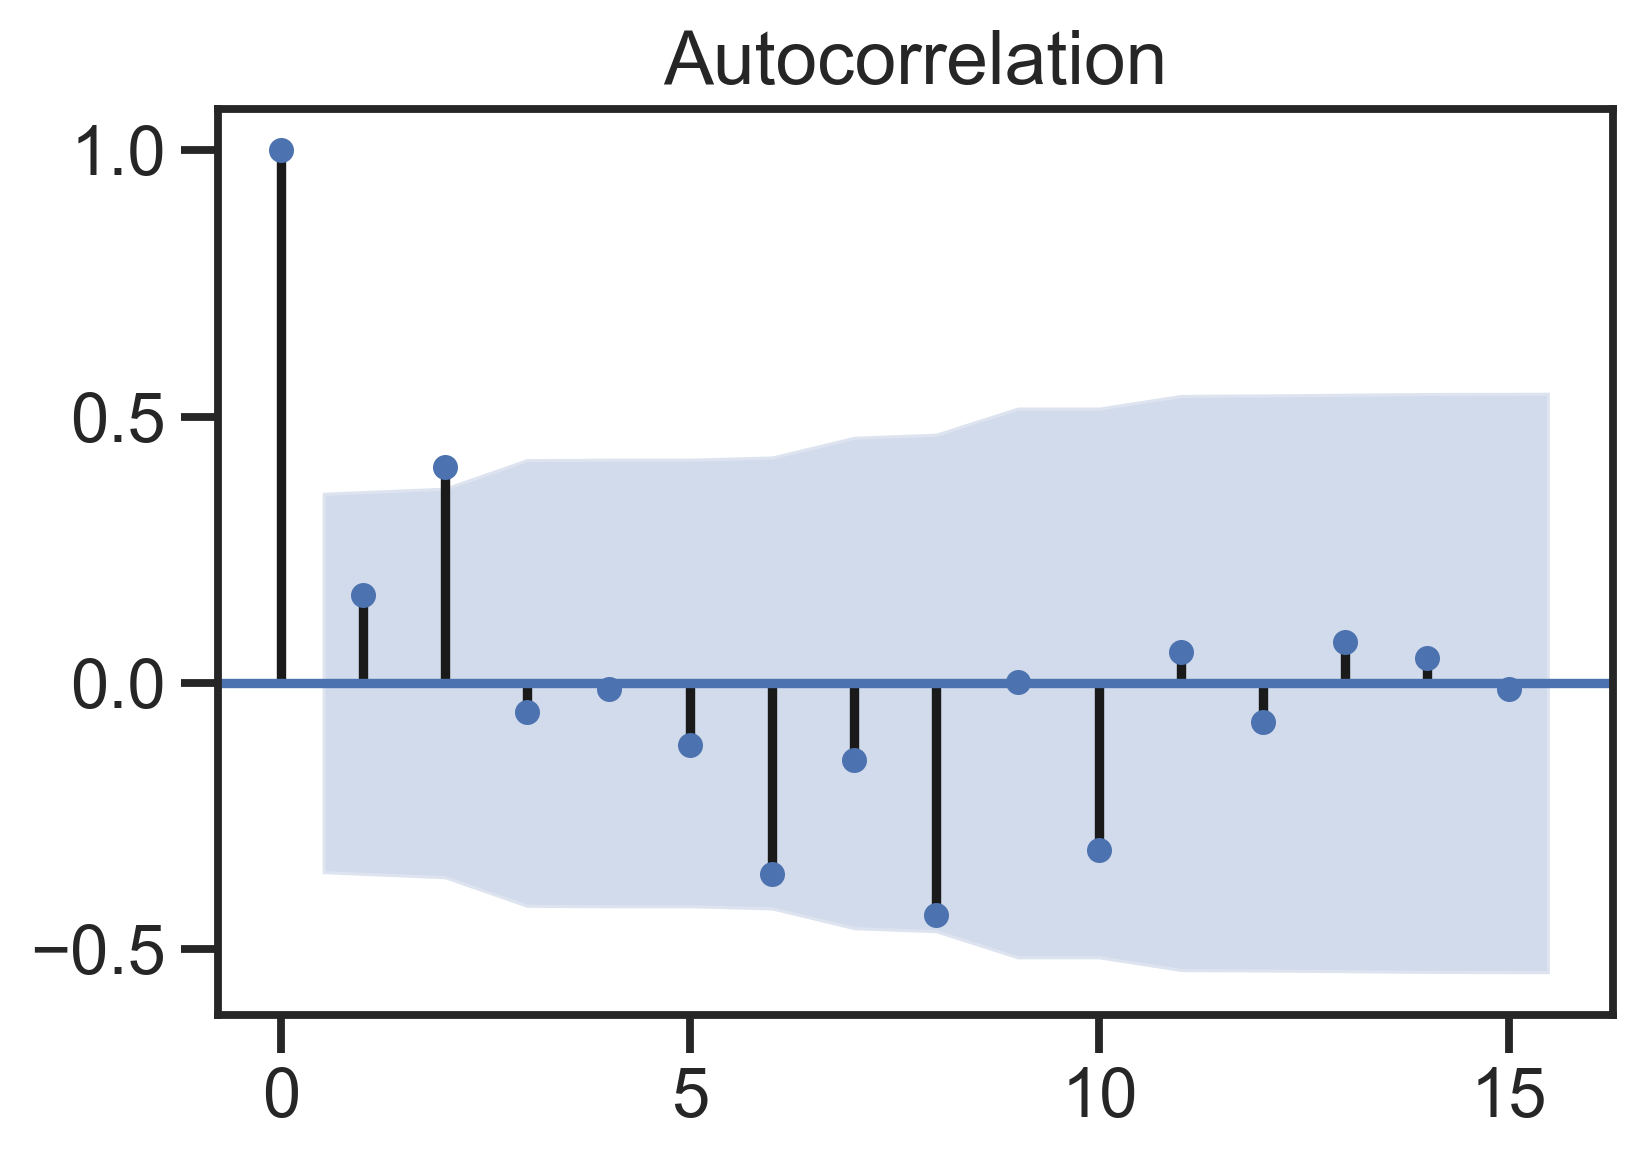

In [91]:
plot_acf(model_residual["Residual"])
plt.show()

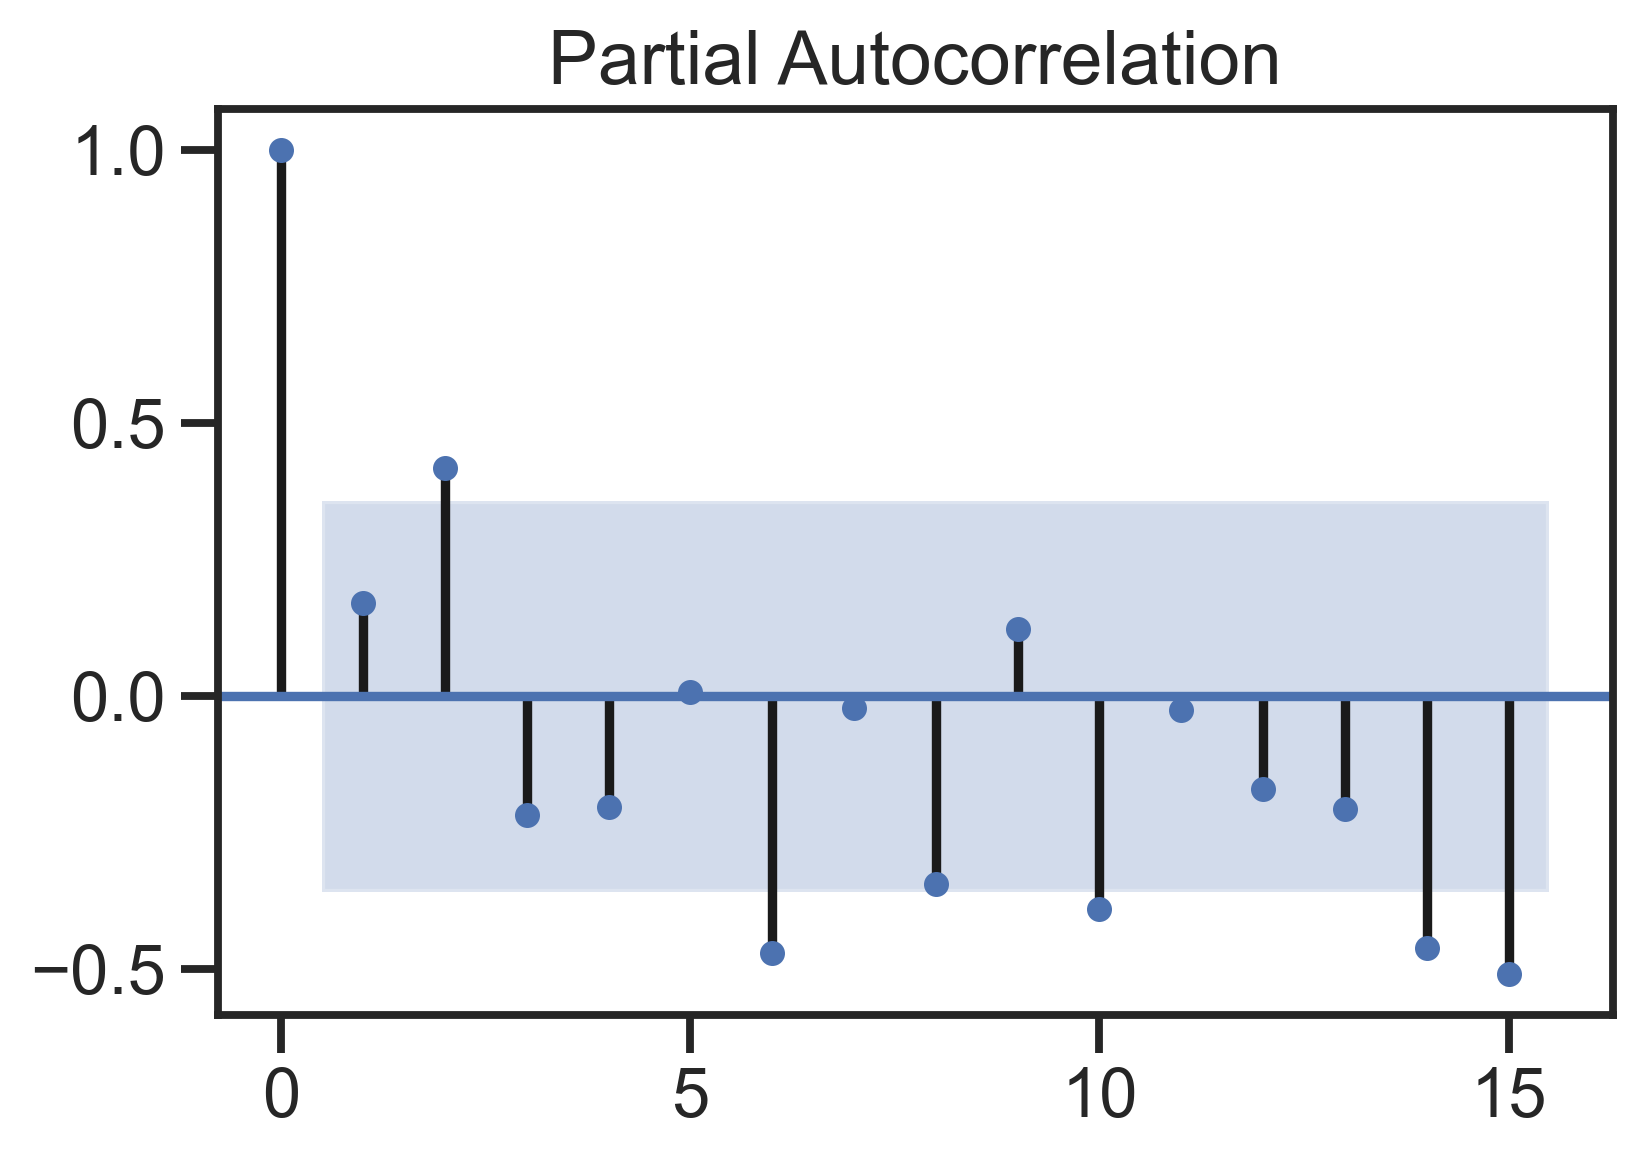

In [92]:
plot_pacf(model_residual["Residual"])
plt.show()